# **Project Data Mining Kelompok 1**

Anggota:<br>

* Tsabita Asir Saladin (210670786)
* Annisa Fitria Anwar Damanik (2106639900)
* Audrey Clarissa (2106724864)
* Rifqi hafizuddin (2106638204)
* Andri Naufal Al'afif (2106725085)

Tanggal : September 2023
<br>
Sumber data: https://docs.google.com/spreadsheets/d/1bX2XqiOGFEszgmqMc5Ym2meC0qeNQEeQ/edit#gid=864316460 <br>

## Permasalahan

**Kasus**
* Anda adalah seorang Data Analyst yang bekerja di PT Ray Pink Property Indonesia (RPPI).
* RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
* RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
* Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
* Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
* Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
* Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
* Di studi kasus ini anda mempersiapkan "bahan presentasi" (cukup ipynb saja) dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

**Petunjuk**

Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi over lunch dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

* Kualitas data yang dimiliki perusahaan.
* Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.
* Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
* Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
* Rumah dengan karakteristik seperti apa yang paling banyak dijual?
* Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
* Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

## **Import Module**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter

## **Koleksi Data**

Akan dilakukan import Data Property di berbagai daerah di Indonesia

In [ ]:
!gdown 1GgmGaUIeeHP8wGiqYj5CbLfEkElavjBj

Downloading...
From: https://drive.google.com/uc?id=1GgmGaUIeeHP8wGiqYj5CbLfEkElavjBj
To: /content/Data-Property-Indonesia-Ganjil-2023 (1).xlsx
100% 779k/779k [00:00<00:00, 27.5MB/s]


In [ ]:
file = '/content/Data-Property-Indonesia-Ganjil-2023 (1).xlsx'
sheets = pd.read_excel(file, sheet_name = None)

Data Property di berbagai daerah di Indonesia memiliki 15 sheets dengan variabel yang sama. Untuk mempermudah melakukan analisis dari semua data yang ada, sheets dari data tersebut akan digabungkan.

In [ ]:
# Gabungin sheets
from pandas.io.excel import ExcelWriter
with ExcelWriter(file) as writer:
  for name, sheet in sheets.items():
    sheet.rename(columns = {sheet.columns[0]:"created_at", sheet.columns[1]:"LT", sheet.columns[2]:"LB",
                            sheet.columns[3]:"KT", sheet.columns[4]:"KM", sheet.columns[5]:"garasi",
                            sheet.columns[6]:"carport", sheet.columns[7]:"lokasi", sheet.columns[8]:"sertifikat",
                            sheet.columns[9]:"listrik", sheet.columns[10]:"hadap", sheet.columns[11]:"harga",
                            sheet.columns[12]:"url", sheet.columns[13]:"deskripsi"}, inplace = True)
    sheet.to_excel(excel_writer = writer, sheet_name  = name, index = False)
  writer.save()

<ipython-input-96-07345f4e2288>:11: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [ ]:
df = pd.concat(sheets)

df = df.reset_index()

#Data yang digunakan
df

,level_0,level_1,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,Unnamed: 14
0,Bogor,0,2021-03-12 00:00:00,75,38.0,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",NaN
1,Bogor,1,2021-06-12 00:00:00,60,40.0,1,1,0,1,Babakan Madang,SHM,2200,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
2,Bogor,2,2021-06-12 00:00:00,60,50.0,2,2,0,1,Babakan Madang,SHM,2200,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
3,Bogor,3,2021-06-12 00:00:00,60,70.0,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
4,Bogor,4,2021-06-12 00:00:00,90,60.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,Sulawesi(All),160,19-09-2023,1030,467.0,2,1,0,1,"Malalayang, Manado",SHM,-,Timur,2300000000,https://www.99.co/id/properti/rumah-dijual-2mi...,*RUMAH DIJUAL MELALUI LELANG !!!*\n\nObjek : T...,NaN
3080,Sulawesi(All),161,18-09-2023,96,96.0,2,1,0,1,"Tanjung Bunga, Makassar, Sulawesi Selatan",SHM,3500,-,675000000,https://www.rumah.com/listing-properti/dijual-...,"Dijual rumah siap huni di perumahan amarylis, ...",NaN
3081,Sulawesi(All),162,17-09-2023,115,45.0,2,1,0,1,"Palu Selatan, Palu, Sulawesi Tengah",SHM,1300,-,348000000,https://www.rumah.com/listing-properti/dijual-...,Jual Cepat Rumah bagus dan strategis Jl. Bante...,NaN
3082,Sulawesi(All),163,14-09-2023,102,72.0,2,1,0,1,"Puuwatu, Kendari. Sulawesi Tenggara",HGB,900,Utara,175000000,https://www.99.co/id/properti/rumah-dijual-175...,PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...,NaN


In [ ]:
#Melihat kolom/variabel yang ada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   level_0      3084 non-null   object 
 1   level_1      3084 non-null   int64  
 2   created_at   3066 non-null   object 
 3   LT           3067 non-null   object 
 4   LB           3065 non-null   float64
 5   KT           3064 non-null   object 
 6   KM           3062 non-null   object 
 7   garasi       2014 non-null   object 
 8   carport      2511 non-null   object 
 9   lokasi       3066 non-null   object 
 10  sertifikat   3057 non-null   object 
 11  listrik      2842 non-null   object 
 12  hadap        1400 non-null   object 
 13  harga        3064 non-null   object 
 14  url          3063 non-null   object 
 15  deskripsi    3041 non-null   object 
 16  Unnamed: 14  6 non-null      object 
dtypes: float64(1), int64(1), object(15)
memory usage: 409.7+ KB


Drop Kolom yang Tidak Diperlukan, yaitu "level_1" dan "Unnamed: 14"

In [ ]:
df = df.rename(columns = {'level_0' :'daerah'})

#Mengdrop kolom yang tidak diperlukan
df = df.drop(['level_1', 'Unnamed: 14'], axis = 1)
df

,daerah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi
0,Bogor,2021-03-12 00:00:00,75,38.0,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,Bogor,2021-06-12 00:00:00,60,40.0,1,1,0,1,Babakan Madang,SHM,2200,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,Bogor,2021-06-12 00:00:00,60,50.0,2,2,0,1,Babakan Madang,SHM,2200,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,Bogor,2021-06-12 00:00:00,60,70.0,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,Bogor,2021-06-12 00:00:00,90,60.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,Sulawesi(All),19-09-2023,1030,467.0,2,1,0,1,"Malalayang, Manado",SHM,-,Timur,2300000000,https://www.99.co/id/properti/rumah-dijual-2mi...,*RUMAH DIJUAL MELALUI LELANG !!!*\n\nObjek : T...
3080,Sulawesi(All),18-09-2023,96,96.0,2,1,0,1,"Tanjung Bunga, Makassar, Sulawesi Selatan",SHM,3500,-,675000000,https://www.rumah.com/listing-properti/dijual-...,"Dijual rumah siap huni di perumahan amarylis, ..."
3081,Sulawesi(All),17-09-2023,115,45.0,2,1,0,1,"Palu Selatan, Palu, Sulawesi Tengah",SHM,1300,-,348000000,https://www.rumah.com/listing-properti/dijual-...,Jual Cepat Rumah bagus dan strategis Jl. Bante...
3082,Sulawesi(All),14-09-2023,102,72.0,2,1,0,1,"Puuwatu, Kendari. Sulawesi Tenggara",HGB,900,Utara,175000000,https://www.99.co/id/properti/rumah-dijual-175...,PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...


In [ ]:
df.shape

(3084, 15)

Didapat bahwa data berisi variabel berikut:
- daerah = Daerah tempat rumah dijual
- created_at = Tanggal upload penjualan rumah ke website
- LT = Luas Tanah dari rumah yang dijual
- LB = Luas Bangunan dari rumah yang dijual
- KT = Jumlah Kamar Tidur dari rumah yang dijual
- KM = Jumlah Kamar Mandi dari rumah yang dijual
- garasi = Jumlah Garasi dari rumah yang dijual
- Carport = Jumlah carport dari rumah yang dijual
- lokasi = Lokasi dari rumah yang dijual
- sertifikat = Jenis sertifikat yang akan didapat dari rumah yang dijual
- listrik = Kapasitas listrik dari rumah yang dijual
- hadap = Arah hadap dari rumah yang dijual
- harga = Harga jual dari rumah yang dijual
- url = Link pembelian rumah yang dijual
- deskripsi = Deskripsi tambahan dari rumah yang dijual

##**Preprocessing**

### **Missing Value dan Duplikat**

In [ ]:
print(df.isna())

      daerah  created_at     LT     LB     KT     KM  garasi  carport  lokasi  \
0      False       False  False  False  False  False   False    False   False   
1      False       False  False  False  False  False   False    False   False   
2      False       False  False  False  False  False   False    False   False   
3      False       False  False  False  False  False   False    False   False   
4      False       False  False  False  False  False   False    False   False   
...      ...         ...    ...    ...    ...    ...     ...      ...     ...   
3079   False       False  False  False  False  False   False    False   False   
3080   False       False  False  False  False  False   False    False   False   
3081   False       False  False  False  False  False   False    False   False   
3082   False       False  False  False  False  False   False    False   False   
3083   False       False  False  False  False  False   False    False   False   

      sertifikat  listrik  

In [ ]:
print(df.isna().sum())

daerah           0
created_at      18
LT              17
LB              19
KT              20
KM              22
garasi        1070
carport        573
lokasi          18
sertifikat      27
listrik        242
hadap         1684
harga           20
url             21
deskripsi       43
dtype: int64


In [ ]:
df.duplicated().sum()

20

In [ ]:
df_no_duplicates = df.drop_duplicates()
print("Data tanpa duplikasi:")
print(df_no_duplicates)

Data tanpa duplikasi:
             daerah           created_at    LT     LB KT KM garasi carport  \
0             Bogor  2021-03-12 00:00:00    75   38.0  2  1      1       1   
1             Bogor  2021-06-12 00:00:00    60   40.0  1  1      0       1   
2             Bogor  2021-06-12 00:00:00    60   50.0  2  2      0       1   
3             Bogor  2021-06-12 00:00:00    60   70.0  3  2      0       1   
4             Bogor  2021-06-12 00:00:00    90   60.0  3  2      0       2   
...             ...                  ...   ...    ... .. ..    ...     ...   
3079  Sulawesi(All)           19-09-2023  1030  467.0  2  1      0       1   
3080  Sulawesi(All)           18-09-2023    96   96.0  2  1      0       1   
3081  Sulawesi(All)           17-09-2023   115   45.0  2  1      0       1   
3082  Sulawesi(All)           14-09-2023   102   72.0  2  1      0       1   
3083  Sulawesi(All)           17-07-2023   127   72.0  2  1      0       1   

                                         

In [ ]:
df.drop_duplicates(keep="first", inplace=True)
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())

(3064, 15)
jumlah data yang duplikat 0


###**Ngecek masing-masing variabel**

####Variabel daerah

In [ ]:
df['daerah'].value_counts()

Bogor                         295
Kalimantan (All)              219
Tangerang                     214
Jakarta                       210
Depok                         205
Padang - Palembang            202
Yogyakarta                    200
Bandung                       199
Surabaya                      197
Medan                         196
Semarang                      194
Bekasi                        193
Bali                          191
Lampung - Sumatera selatan    184
Sulawesi(All)                 165
Name: daerah, dtype: int64

####Variabel created_at

In [ ]:
df[df['created_at'].isna()]

,daerah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi
1721,Padang - Palembang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1738,Padang - Palembang,NaN,Keterangan = Harga dalam bentuk juta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####Variabel LT

In [ ]:
df['LT'].value_counts()

72      147
60      143
90      123
120     107
100      84
       ... 
15        1
31        1
1166      1
1100      1
425       1
Name: LT, Length: 482, dtype: int64

In [ ]:
df[df['LT'].isna()]

,daerah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi
1721,Padang - Palembang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(df.index[1721], inplace =True)

####Variabel LB

In [ ]:
df['LB'].value_counts()

45.0     146
36.0     137
100.0    112
70.0     106
60.0     106
        ... 
444.0      1
438.0      1
302.0      1
242.0      1
467.0      1
Name: LB, Length: 357, dtype: int64

In [ ]:
df[df['LB'].isna()]

,daerah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi
299,Lampung - Sumatera selatan,2021-05-12 00:00:00,391,NaN,7.0,7.0,NaN,NaN,"Teluk Betung Utara, Bandar Lampung",SHM,Token,NaN,1000000000,https://rumahdijual.com/lampung/10121111-rumah...,"sumber air tanah, bebas banjir, butuh renovasi"
1738,Padang - Palembang,NaN,Keterangan = Harga dalam bentuk juta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(df.index[1738], inplace =True)

####Variabel KT, KM, garasi, dan carport

Missing Value dianggap 0

In [ ]:
## missing valuenya dianggep 0 aja
var = ['KT', 'KM', 'garasi', 'carport']

for i in var:
  df[i] = df[i].replace(r'-', np.nan, regex = True)
  df[i].fillna(value = 0, inplace = True)
df.isna().sum()

daerah           0
created_at       1
LT               0
LB               2
KT               0
KM               0
garasi           0
carport          0
lokasi           1
sertifikat      10
listrik        225
hadap         1664
harga            3
url              4
deskripsi       26
dtype: int64

####Variabel lokasi

In [ ]:
df['lokasi'].value_counts()

Kota Semarang                                               105
Denpasar                                                     86
Bandung Kota                                                 75
Kota Bekasi                                                  74
Palembang                                                    55
                                                           ... 
Sukatani                                                      1
Jekan Raya, Palangkaraya\n                                    1
Bukit Batu, Palangkaraya                                      1
Arut Selatan, Kotawaringin Barat Kab., Kalimantan Tengah      1
Mamuju, Sulawesi Barat                                        1
Name: lokasi, Length: 658, dtype: int64

####Variabel sertifikat

In [ ]:
df['sertifikat'].value_counts()

SHM                                2723
SHGB                                121
HGB                                 117
lainnya(PPJB, GIRIK, ADAT, dll)      20
SHM + IMB                            17
Lainnya                              14
PPJB                                 11
SPPJB                                 4
SHM - IMB                             4
HP                                    3
Lainnya (PPJB,Girik,Adat,dll)         3
SHM,IMB                               2
SHM                                   2
-                                     2
Hak Pakai                             1
AJB                                   1
SHM + Hak Pakai                       1
PPJB,Girik,Adat,dll                   1
HJB                                   1
SHM & IMB                             1
SHBG                                  1
SMB                                   1
SHM + IMB + PBB                       1
Name: sertifikat, dtype: int64

In [ ]:
df['sertifikat'].replace("SHM ", "SHM", inplace=True)
df['sertifikat'].replace("SHBG", "SHGB", inplace=True)
df['sertifikat'].replace("HGB", "SHGB", inplace=True)
df['sertifikat'].replace("lainnya(PPJB, GIRIK, ADAT, dll)", "Lainnya", inplace=True)
df['sertifikat'].replace("SHM + IMB", "SHM", inplace=True)
df['sertifikat'].replace("Lainnya", "Lainnya", inplace=True)
df['sertifikat'].replace("PPJB", "Lainnya", inplace=True)
df['sertifikat'].replace("SPPJB", "Lainnya", inplace=True)
df['sertifikat'].replace("SHM - IMB", "SHM", inplace=True)
df['sertifikat'].replace("HP", "Lainnya", inplace=True)
df['sertifikat'].replace("Lainnya (PPJB,Girik,Adat,dll)", "Lainnya", inplace=True)
df['sertifikat'].replace("SHM,IMB", "SHM", inplace=True)
df['sertifikat'].replace("SHM ", "SHM", inplace=True)
df['sertifikat'].replace("Hak Pakai", "Lainnya", inplace=True)
df['sertifikat'].replace("AJB", "Lainnya", inplace=True)
df['sertifikat'].replace("SHM + Hak Pakai", "SHM", inplace=True)
df['sertifikat'].replace("PPJB,Girik,Adat,dll", "Lainnya", inplace=True)
df['sertifikat'].replace("PPJB,Girik,Adat,dll", "Lainnya", inplace=True)
df['sertifikat'].replace("HJB", "Lainnya", inplace=True)
df['sertifikat'].replace("SHM & IMB", "SHM", inplace=True)
df['sertifikat'].replace("SMB ", "Lainnya", inplace=True)
df['sertifikat'].replace("SHBG", "SHGB", inplace=True)
df['sertifikat'].replace("SHM + IMB + PBB", "SHM", inplace=True)
df['sertifikat'] = df['sertifikat'].fillna("-")

df['sertifikat'].value_counts()

SHM        2751
SHGB        239
Lainnya      60
-            12
Name: sertifikat, dtype: int64

In [ ]:
df[df['sertifikat'].isna()]

,daerah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi


In [ ]:
df['sertifikat']

0        SHM
1        SHM
2        SHM
3        SHM
4        SHM
        ... 
3079     SHM
3080     SHM
3081     SHM
3082    SHGB
3083     SHM
Name: sertifikat, Length: 3062, dtype: object

####Variabel Listrik

In [ ]:
df['listrik'].value_counts()

2200         1048
1300          924
3500          204
4400          152
5500          118
             ... 
18000.0         1
2400 Watt       1
3300 Watt       1
5500 Watt       1
4899            1
Name: listrik, Length: 66, dtype: int64

In [ ]:
df['listrik'].replace('450 Va/R-1','450',inplace = True) #ubah input datra yang berbeda sendiri
df['listrik'] = df['listrik'].replace('[a-zA-Z]', '', regex=True) #hapus string pada data
df['listrik'] = df['listrik'].replace(r'/-1', '', regex=True)
df['listrik'] = df['listrik'].replace(['', ' ', '-', 0], np.nan)

In [ ]:
df['listrik'].value_counts()

2200       1048
1300        924
3500        204
4400        152
5500        118
900          63
1300         63
3300         38
7700.0       28
6600         23
11000.0      20
2200         12
10000.0       8
13200         8
16500         7
450           6
900           5
3500          5
8000.0        4
33000         4
23000.0       4
2300          3
1200          3
2000          3
66000.0       3
10600.0       3
4400          2
4500.0        2
220           2
19000.0       2
3000.0        2
22000.0       2
11500.0       1
130.0         1
38500.0       1
2400          1
5000.0        1
15000         1
2500.0        1
13900.0       1
4000.0        1
7500.0        1
400           1
13300.0       1
7600.0        1
3900.0        1
16000.0       1
9500.0        1
9900.0        1
26400.0       1
13000.0       1
18000.0       1
5500          1
3300          1
2400          1
2300          1
450           1
17600         1
4899          1
Name: listrik, dtype: int64

In [ ]:
df['listrik'] = df['listrik'].fillna(df['listrik'].median())

####Variabel Hadap

In [ ]:
df['hadap'].value_counts()

Timur                     362
Utara                     301
Selatan                   284
Barat                     166
-                          83
Timur Laut                 31
selatan                    30
Tenggara                   25
Barat Daya                 23
timur                      22
utara                      19
Barat Laut                 14
barat                       8
Timur                       3
utara - barat               3
Utara-Timur                 2
tenggara                    2
timur - selatan             2
Timur, Utara                1
Utara dan Timur (Hook)      1
Utara-Barat                 1
Timur-Utara                 1
selatan - barat             1
utara - selatan             1
Selatan dan Barat           1
Selatan dan Timur           1
Selatan dan Utara           1
Timur laut                  1
Barat & Selatan             1
Selatan, Utara              1
Selatan & Barat             1
timur utara                 1
barat laut                  1
barat     

Menyatukan beberapa arah hadap yang sama

Contoh:

- "timur" dan "Timur"
- "timur-selatan", "Selatan dan Timur", "Selatan/Timur", "tenggara", "Tenggara"

In [ ]:
df['hadap'].replace("selatan", "Selatan", inplace=True)
df['hadap'].replace("timur", "Timur", inplace=True)
df['hadap'].replace("utara", "Utara", inplace=True)
df['hadap'].replace("barat", "Barat", inplace=True)
df['hadap'].replace("Timur ", "Timur", inplace=True)
df['hadap'].replace("utara - barat", "Barat Laut", inplace=True)
df['hadap'].replace("tenggara", "Tenggara", inplace=True)
df['hadap'].replace("Utara-Timur", "Timur Laut", inplace=True)
df['hadap'].replace("timur - selatan", "Tenggara", inplace=True)
df['hadap'].replace("Barat & Selatan", "Barat Daya", inplace=True)
df['hadap'].replace("Utara dan Timur (Hook)", "Timur Laut", inplace=True)
df['hadap'].replace("Tamur Laut", "Timur Laut", inplace=True)
df['hadap'].replace("Timur laut", "Timur Laut", inplace=True)
df['hadap'].replace("Selatan dan Barat", "Barat Daya", inplace=True)
df['hadap'].replace("barat", "Barat", inplace=True)
df['hadap'].replace("barat  ", "Barat", inplace=True)
df['hadap'].replace("barat laut", "Barat", inplace=True)
df['hadap'].replace("Selatan dan Timur", "Tenggara", inplace=True)
df['hadap'].replace("Utara-Barat", "Barat Laut", inplace=True)
df['hadap'].replace("Utara-Barat", "Barat Laut", inplace=True)
df['hadap'].replace("Selatan, Utara", "Selatan-Utara", inplace=True)
df['hadap'].replace("Selatan dan Utara", "Selatan-Utara", inplace=True)
df['hadap'].replace("timur utara", "Timur Laut", inplace=True)
df['hadap'].replace("Selatan & Barat", "Barat Daya", inplace=True)
df['hadap'].replace("Timur, Utara", "Timur Laut", inplace=True)
df['hadap'].replace("utara - selatan", "Selatan-Utara", inplace=True)
df['hadap'].replace("selatan - barat", "Barat Daya", inplace=True)
df['hadap'].replace("Timur-Utara", "Timur Laut", inplace=True)
df['hadap'].replace("Selatan/Timur", "Tenggara", inplace=True)
df['hadap'].replace("Danau", "-", inplace=True)
df['hadap'].replace("-", "", inplace=True)
df['hadap'].value_counts()

Timur            387
Utara            320
Selatan          314
Barat            176
                  84
Timur Laut        38
Tenggara          31
Barat Daya        27
Barat Laut        18
Selatan-Utara      3
Name: hadap, dtype: int64

####Variabel Harga

In [ ]:
df['harga'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3062 entries, 0 to 3083
Series name: harga
Non-Null Count  Dtype 
--------------  ----- 
3059 non-null   object
dtypes: object(1)
memory usage: 47.8+ KB


In [ ]:
df['harga'].value_counts()

1500000000    55
1200000000    52
850000000     43
600000000     40
1300000000    40
              ..
5300           1
2410           1
2600           1
5050           1
348000000      1
Name: harga, Length: 907, dtype: int64

In [ ]:
df['harga'].isna().sum()

3

In [ ]:
df[df['harga'].isna()]

,daerah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi
861,Kalimantan (All),2023-07-09 00:00:00,73,50.0,2.0,1.0,0.0,0.0,"Bontang Utara, Bontang, Kalimantan Timur",SHM,1300.0,NaN,NaN,NaN,NaN
1738,Padang - Palembang,NaN,Keterangan = Harga dalam bentuk juta,NaN,0.0,0.0,0.0,0.0,NaN,-,2200.0,NaN,NaN,NaN,NaN
2130,Bandung,30-07-2023,157,157.0,4.0,2.0,0.0,1.0,Cileunyi,SHM,1300.0,NaN,NaN,NaN,NaN


In [ ]:
df_cleaned = df.dropna(how='all', inplace = True)

Hapus Rumah yang Tidak Memiliki Harga

In [ ]:
## hapus rumah yang tidak memiliki harga
df.dropna(subset=['harga'], inplace=True)

Standarisasi Harga

In [ ]:
## standarisasi harga
df['harga'] = df['harga'].replace(r'Rp. ', '', regex=True)
df['harga'] = df['harga'].replace(r'Rp.', '', regex=True)
df['harga'] = df['harga'].replace(r'Rp ', '', regex=True)
df['harga'] = df['harga'].replace(r'RP. ', '', regex=True)

In [ ]:
def clean_price(x):
    if isinstance(x, str):
        return(x.replace('.', ''))
    return(x)

In [ ]:
df['harga'] = df['harga'].apply(clean_price).astype('int')

In [ ]:
df['harga'].isna().sum()

0

In [ ]:
df["harga"]=df["harga"].astype(int)
df = df.reset_index(drop=True)

In [ ]:
for i in range(len(df['harga'])):
  if df['harga'][i] < 1000000:
    df['harga'][i] *= 1000000

<ipython-input-137-c0166d39bde4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['harga'][i] *= 1000000


In [ ]:
for i in range(len(df['harga'])):
  if df['harga'][i] < 10000000:
    df['harga'][i] *= 1000

<ipython-input-138-3477054308d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['harga'][i] *= 1000


In [ ]:
for i in range(len(df['harga'])):
  if df['harga'][i] > 1000000000000:
    df['harga'][i] /= 1000

<ipython-input-139-12f7a3943ef9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['harga'][i] /= 1000


In [ ]:
for i in range(len(df['harga'])):
  if df['harga'][i] > 100000000 and df['harga'][i] == "Jakarta" :
    df['harga'][i] *= 1000

In [ ]:
df.isnull().sum()

daerah           0
created_at       0
LT               0
LB               1
KT               0
KM               0
garasi           0
carport          0
lokasi           0
sertifikat       0
listrik          0
hadap         1661
harga            0
url              1
deskripsi       23
dtype: int64

In [ ]:
df["LT"] = df["LT"].astype(float)
df["LB"] = df["LB"].astype(float)
df["KT"] = df["KT"].astype(int)
df["KM"] = df["KM"].astype(int)
df["listrik"] = df["listrik"].astype(int)
df["daerah"] = df["daerah"].astype("category")
df["sertifikat"] = df["sertifikat"].astype("category")
df["hadap"] = df["hadap"].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059 entries, 0 to 3058
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   daerah      3059 non-null   category
 1   created_at  3059 non-null   object  
 2   LT          3059 non-null   float64 
 3   LB          3058 non-null   float64 
 4   KT          3059 non-null   int64   
 5   KM          3059 non-null   int64   
 6   garasi      3059 non-null   float64 
 7   carport     3059 non-null   float64 
 8   lokasi      3059 non-null   object  
 9   sertifikat  3059 non-null   category
 10  listrik     3059 non-null   int64   
 11  hadap       1398 non-null   category
 12  harga       3059 non-null   int64   
 13  url         3058 non-null   object  
 14  deskripsi   3036 non-null   object  
dtypes: category(3), float64(4), int64(4), object(4)
memory usage: 297.1+ KB


In [ ]:
df[["url","deskripsi"]]

,url,deskripsi
0,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...
3054,https://www.99.co/id/properti/rumah-dijual-2mi...,*RUMAH DIJUAL MELALUI LELANG !!!*\n\nObjek : T...
3055,https://www.rumah.com/listing-properti/dijual-...,"Dijual rumah siap huni di perumahan amarylis, ..."
3056,https://www.rumah.com/listing-properti/dijual-...,Jual Cepat Rumah bagus dan strategis Jl. Bante...
3057,https://www.99.co/id/properti/rumah-dijual-175...,PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...


In [ ]:
df.drop(df[["url","deskripsi"]], inplace=True, axis=1)

###**Outlier**

**Memisahkan Outliers** Menggunakan Kuartil & Interquartile Range (IQR)

Outliers Bawah < Q1 - 1.5 IQR

Outliers Atas > Q3 + 1.5 IQR

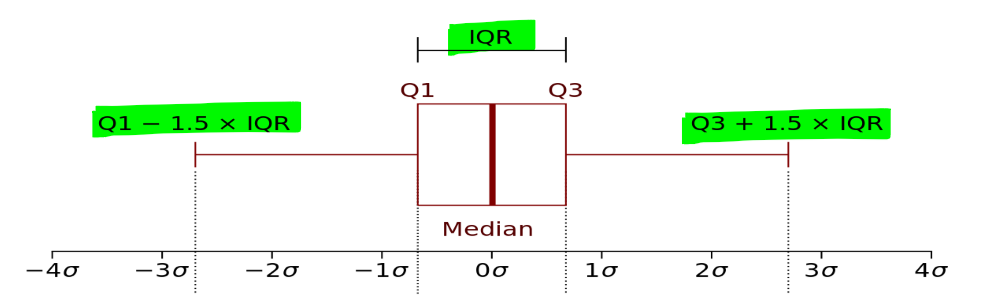

#### **HARGA**

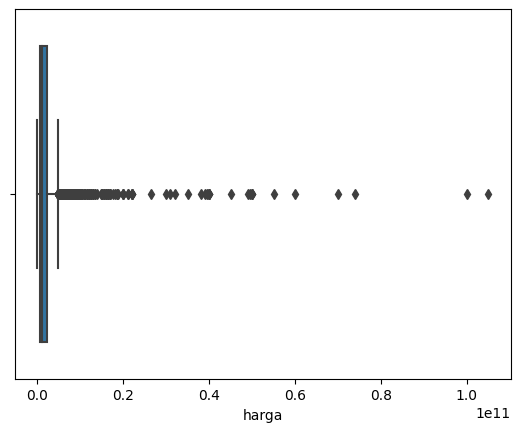

In [ ]:
p = sns.boxplot(x="harga", data=df)

In [ ]:
Q1 = df['harga'].quantile(0.25)
Q2 = df['harga'].quantile(0.50)
Q3 = df['harga'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = (df['harga'] < (Q1 - 1.5 *IQR)) # Outlier bawah
#outliers_atas = (df['harga'] > (Q3 + 1.5 *IQR)) # Outlier atas
#rumah_murah = d.loc[outliers_bawah]
#rumah_kemahalan = d.loc[outliers_atas]

harga_no_outlier = (df['harga'] >= Q1 - 1.5 * IQR) & (df['harga'] <= Q3 + 1.5 *IQR)
harga_outlier = (df['harga'] < Q1 - 1.5 * IQR) | (df['harga'] > Q3 + 1.5 *IQR)

Q1=600000000.0, Q3=2240000000.0, IQR=1640000000.0


####createad at

In [ ]:
df["created_at"] = pd.to_datetime(df["created_at"])

<ipython-input-148-12219dd75530>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["created_at"] = pd.to_datetime(df["created_at"])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059 entries, 0 to 3058
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   daerah      3059 non-null   category      
 1   created_at  3059 non-null   datetime64[ns]
 2   LT          3059 non-null   float64       
 3   LB          3058 non-null   float64       
 4   KT          3059 non-null   int64         
 5   KM          3059 non-null   int64         
 6   garasi      3059 non-null   float64       
 7   carport     3059 non-null   float64       
 8   lokasi      3059 non-null   object        
 9   sertifikat  3059 non-null   category      
 10  listrik     3059 non-null   int64         
 11  hadap       1398 non-null   category      
 12  harga       3059 non-null   int64         
dtypes: category(3), datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 249.3+ KB


In [ ]:
df_2021 = df[df["created_at"].dt.year == 2021]
df_2023 = df[df["created_at"].dt.year == 2023]
df_time = pd.concat([df_2021,df_2023],ignore_index=True, sort=False)

#### **LT**

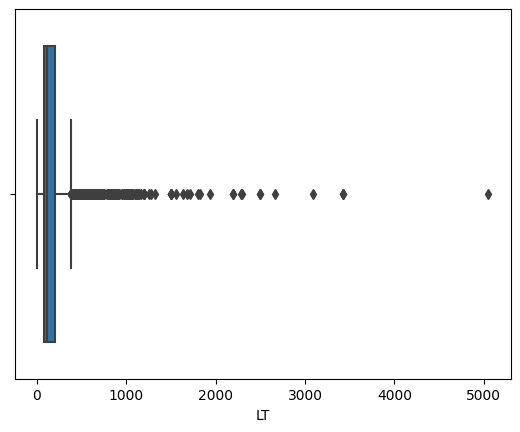

In [ ]:
p = sns.boxplot(x="LT", data=df)

In [ ]:
Q1 = df['LT'].quantile(0.25)
Q2 = df['LT'].quantile(0.50)
Q3 = df['LT'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = (df['LT'] < (Q1 - 1.5 *IQR))
#outliers_atas = (df['LT'] > (Q3 + 1.5 *IQR))


LT_no_outlier = (df['LT'] >= Q1 - 1.5 * IQR) & (df['LT'] <= Q3 + 1.5 *IQR)
LT_outlier = (df['LT'] < Q1 - 1.5 * IQR) | (df['LT'] > Q3 + 1.5 *IQR)

Q1=81.0, Q3=200.0, IQR=119.0


#### **LB**

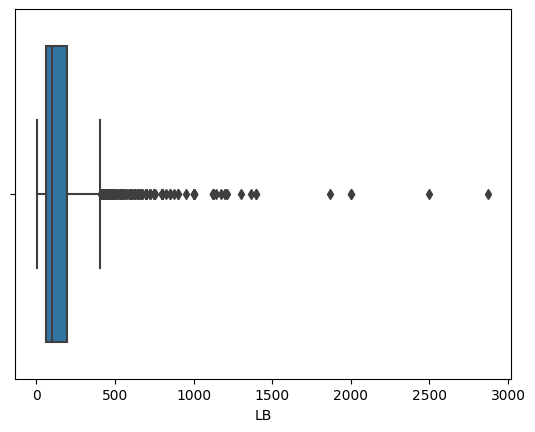

In [ ]:
p = sns.boxplot(x="LB", data=df)

In [ ]:
Q1 = df['LB'].quantile(0.25)
Q2 = df['LB'].quantile(0.50)
Q3 = df['LB'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = (df['LB'] < (Q1 - 1.5 *IQR))
#outliers_atas = (df['LB'] > (Q3 + 1.5 *IQR))

LB_no_outlier = (df['LB'] >= Q1 - 1.5 * IQR) & (df['LB'] <= Q3 + 1.5 *IQR)
LB_outlier = (df["LB"] < Q1 - 1.5 * IQR) | (df['LB'] > Q3 + 1.5 *IQR)

Q1=60.0, Q3=198.0, IQR=138.0


#### **KT**

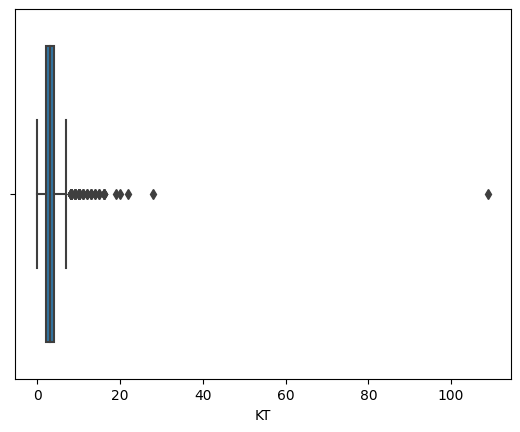

In [ ]:
p = sns.boxplot(x="KT", data=df)

In [ ]:
Q1 = df['KT'].quantile(0.25)
Q2 = df['KT'].quantile(0.50)
Q3 = df['KT'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = (df['KT'] < (Q1 - 1.5 *IQR))
#outliers_atas = (df['KT'] > (Q3 + 1.5 *IQR))

KT_no_outlier = (df['KT'] >= Q1 - 1.5 * IQR) & (df['KT'] <= Q3 + 1.5 *IQR)
KT_outlier = (df["KT"] < Q1 - 1.5 * IQR) | (df['KT'] > Q3 + 1.5 *IQR)

Q1=2.0, Q3=4.0, IQR=2.0


In [ ]:
KT_no_outlier

0       True
1       True
2       True
3       True
4       True
        ... 
3054    True
3055    True
3056    True
3057    True
3058    True
Name: KT, Length: 3059, dtype: bool

#### **KM**

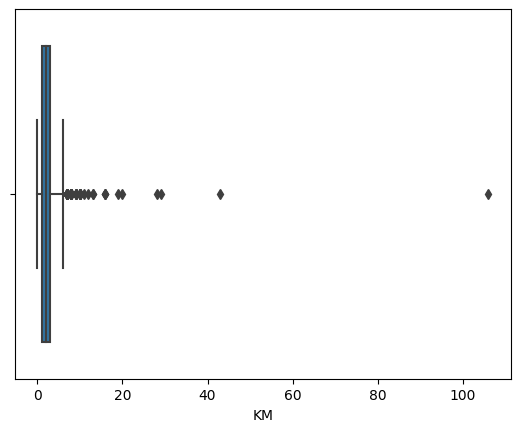

In [ ]:
p = sns.boxplot(x="KM", data=df)

In [ ]:
Q1 = df['KM'].quantile(0.25)
Q2 = df['KM'].quantile(0.50)
Q3 = df['KM'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = (df['KM'] < (Q1 - 1.5 *IQR))
#outliers_atas = (df['KM'] > (Q3 + 1.5 *IQR))


KM_no_outlier = (df['KM'] >= Q1 - 1.5 * IQR) & (df['KM'] <= Q3 + 1.5 *IQR)
KM_outlier = (df['KM'] < Q1 - 1.5 * IQR) | (df['KM'] > Q3 + 1.5 *IQR)

Q1=1.0, Q3=3.0, IQR=2.0


####Garasi

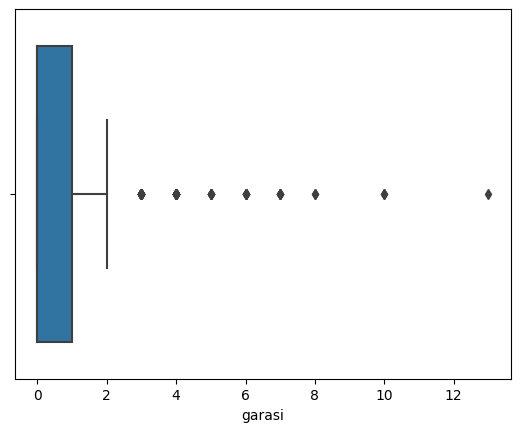

In [ ]:
p = sns.boxplot(x="garasi", data=df)

In [ ]:
Q1 = df['garasi'].quantile(0.25)
Q2 = df['garasi'].quantile(0.50)
Q3 = df['garasi'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = (df['garasi'] < (Q1 - 1.5 *IQR))
#outliers_atas = (df['garasi'] > (Q3 + 1.5 *IQR))


garasi_no_outlier = (df['garasi'] >= Q1 - 1.5 * IQR) & (df['garasi'] <= Q3 + 1.5 *IQR)
garasi_outlier = (df['garasi'] < Q1 - 1.5 * IQR) | (df['garasi'] > Q3 + 1.5 *IQR)

Q1=0.0, Q3=1.0, IQR=1.0


####Carport

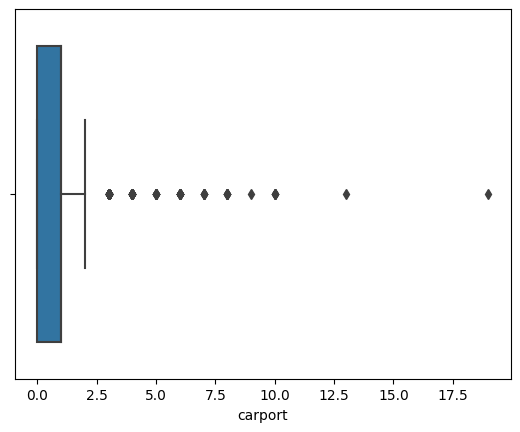

In [ ]:
p = sns.boxplot(x="carport", data=df)

In [ ]:
Q1 = df['carport'].quantile(0.25)
Q2 = df['carport'].quantile(0.50)
Q3 = df['carport'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = (df['carport'] < (Q1 - 1.5 *IQR))
#outliers_atas = (df['carport'] > (Q3 + 1.5 *IQR))


carport_no_outlier = (df['carport'] >= Q1 - 1.5 * IQR) & (df['carport'] <= Q3 + 1.5 *IQR)
carport_outlier = (df['carport'] < Q1 - 1.5 * IQR) | (df['carport'] > Q3 + 1.5 *IQR)

Q1=0.0, Q3=1.0, IQR=1.0


####Listrik

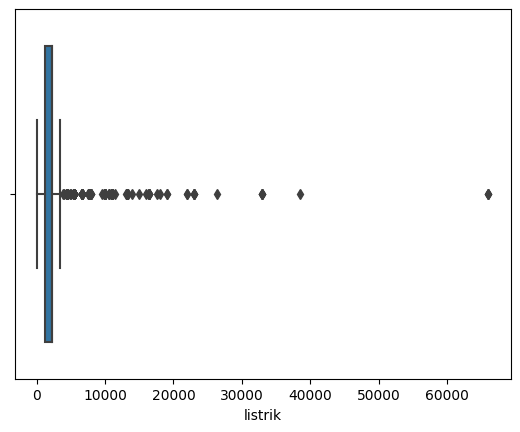

In [ ]:
p = sns.boxplot(x="listrik", data=df)

In [ ]:
Q1 = df['listrik'].quantile(0.25)
Q2 = df['listrik'].quantile(0.50)
Q3 = df['listrik'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = (df['listrik'] < (Q1 - 1.5 *IQR))
#outliers_atas = (df['listrik'] > (Q3 + 1.5 *IQR))

listrik_no_outlier = (df['listrik'] >= Q1 - 1.5 * IQR) & (df['listrik'] <= Q3 + 1.5 *IQR)
listrik_outlier = (df['listrik'] < Q1 - 1.5 * IQR) | (df['listrik'] > Q3 + 1.5 *IQR)

Q1=1300.0, Q3=2200.0, IQR=900.0


#Save Preprocessing

In [ ]:
df.to_csv("harga_rumah_PreProcessed.csv",encoding ="utf-8")

##**Visualization**

#### 1. Kualitas data yang dimiliki perusahaan

Menurut kelompok kami, kualitas data yang dimiliki perusahaan RPPI **Kurang Baik** karena tidak memenuhi standar kualitas data. Aspek kualitas data yang tidak memenuhi standar antara lain:
* *Data Consistency*, karena terdapat kolom yang memiliki format berbeda dengan halaman yang lain,
* *Data Completeness*, Karena masih terdapat banyak missing value pada dataset.

#### 2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul

Saran dari kami agar RPPI menjadi data driven company yang unggul antara lain:


1.   Mengurangi missing value pada dataset
2.   Melakukan standarisasi untuk setiap kolom, misalnya kolom 'harga'
3.   Menggunakan teknik sampling saat memilih data rumah supaya tidak terjadi bias
4.   Menambahkan data faktor lain supaya dapat menambah insight dari dataset



#### 3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?

In [ ]:
df_harga_no_outlier = df[harga_no_outlier]
df_harga_outlier = df[harga_outlier]
df_LT_no_outlier = df[LT_no_outlier]
df_LT_outlier = df[LT_outlier]
df_LB_no_outlier = df[LB_no_outlier]
df_LB_outlier = df[LB_outlier]
df_KT_no_outlier = df[KT_no_outlier]
df_KT_outlier = df[KT_outlier]
df_KM_no_outlier = df[KM_no_outlier]
df_KM_outlier = df[KM_outlier]
df_garasi_no_outlier = df[garasi_no_outlier]
df_garasi_outlier = df[garasi_outlier]
df_carport_no_outlier = df[carport_no_outlier]
df_carport_outlier = df[carport_outlier]
df_listrik_no_outlier = df[listrik_no_outlier]
df_listrik_outlier = df[listrik_outlier]

In [ ]:
df_listrik_outlier

,daerah,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
26,Bogor,2021-06-12,1500.0,1200.0,8,6,0.0,8.0,Cileungsi,SHM,17600,NaN,9900000000
37,Bogor,2021-06-12,1272.0,500.0,4,5,0.0,2.0,Babakan Madang,SHM,5500,NaN,15000000000
46,Bogor,2021-06-12,167.0,300.0,4,3,2.0,0.0,Gunung Putri,SHM,5500,Timur Laut,3200000000
50,Bogor,2021-06-12,200.0,202.0,5,5,2.0,2.0,Gunung Putri,SHM,4400,Selatan-Utara,3128000000
54,Bogor,2021-07-12,200.0,260.0,4,4,1.0,1.0,Gunung Putri,SHM,4400,NaN,2975000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,Sulawesi(All),2023-12-09,160.0,150.0,4,4,0.0,1.0,"Malalayang, Manado",SHM,4400,NaN,1500000000
3042,Sulawesi(All),2023-04-09,1030.0,472.0,5,5,0.0,6.0,"Malalayang, Manado",SHM,5500,NaN,2800000000
3047,Sulawesi(All),2023-04-09,200.0,360.0,4,4,2.0,2.0,"Panakkukang, Makassar",SHM,4400,NaN,7500000000
3050,Sulawesi(All),2023-07-24,121.0,153.0,3,3,2.0,2.0,"Wanea, Manado",SHM,4899,Barat Laut,1600000000


Text(0.5, 1.0, 'Harga Rumah per Daerah yang Dijual\n(Tanpa Outlier)')

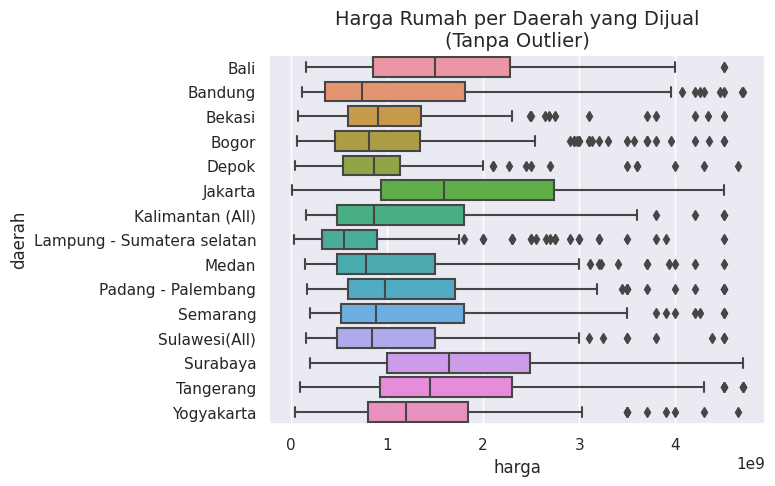

In [ ]:
p= sns.boxplot(y="daerah", x="harga", data=df_harga_no_outlier)
plt.title('Harga Rumah per Daerah yang Dijual\n(Tanpa Outlier)', fontsize=14)

Text(0.5, 1.0, 'Harga Rumah per Daerah yang Dijual\n(Hanya Outlier)')

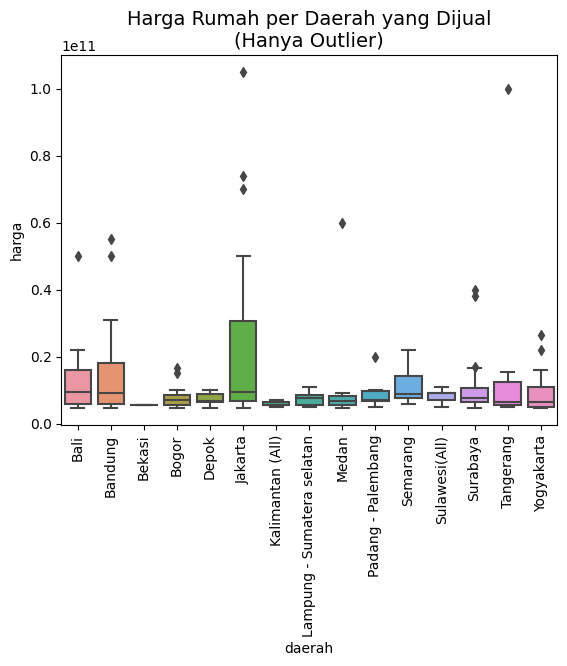

In [ ]:
p= sns.boxplot(x="daerah", y="harga", data=df_harga_outlier)
plt.xticks(rotation=90)
plt.title('Harga Rumah per Daerah yang Dijual\n(Hanya Outlier)', fontsize=14)

Dari visualisasi boxplot tanpa outlier, terlihat bahwa hampir seluruh daerah mempunyai harga yang cukup mirip. Namun, terdapat beberapa daerah yang relatif **lebih mahal** daripada daerah lain seperti Jakarta, Bali, Surabaya, dan Tangerang. Selain itu, Lampung relatif **lebih murah** daripada daerah lainnya.

Dari visualisasi boxplot hanya outlier, terlihat bahwa seluruh daerah mempunyai range harga yang cukup mirip, kecuali Jakarta dengan harga yang lebih mahal daripada daerah lainnya. Namun, plot outlier tidak dapat dijadikan patokan karena dapat berupa anomali data.


---


Oleh karena itu, terdapat kecenderungan rumah **lebih mahal** di daerah Jakarta, Bali, Surabaya, dan Tangerang. Terdapat juga kecenderungan rumah **lebih murah** di Kota Lampung

#### 4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).

Text(0.5, 1.0, 'Jumlah Rumah per Daerah yang Dijual')

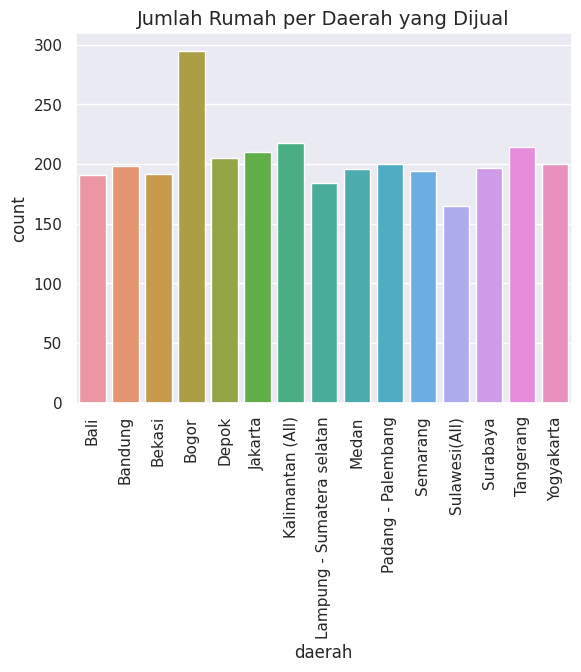

In [ ]:

sns.set(style="darkgrid")
ax = sns.countplot(x="daerah", data=df)
plt.xticks(rotation = 90)
plt.title('Jumlah Rumah per Daerah yang Dijual', fontsize=14)

Text(0.5, 1.0, 'Harga Rumah per Daerah yang Dijual Tanpa Outlier')

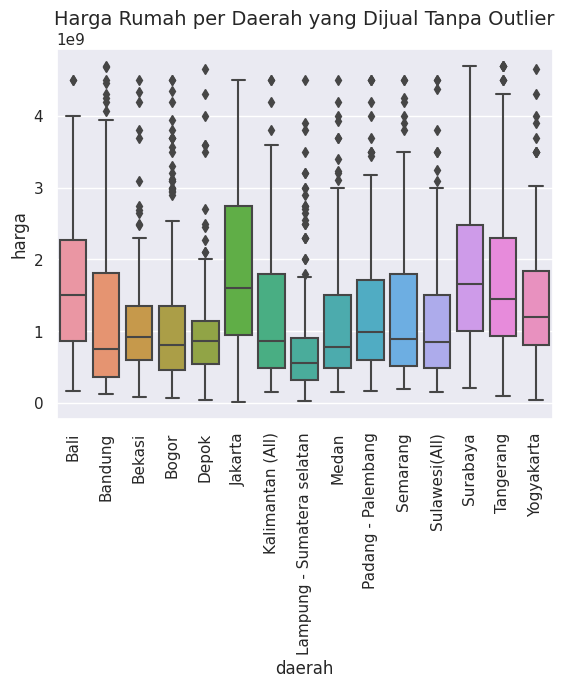

In [ ]:
p= sns.boxplot(x="daerah", y="harga", data=df_harga_no_outlier)
plt.xticks(rotation=90)
plt.title('Harga Rumah per Daerah yang Dijual Tanpa Outlier', fontsize=14)

Berdasarkan kedua hasil visualisasi tersebut, terlihat bahwa Kota Bogor menjual rumah terbanyak dan memiliki harga yang relatif murah dibandingkan dengan daerah lain, sehingga dapat disimpulkan bahwa Kota Bogor memiliki *demand* rumah yang tinggi.

Oleh karena itu, kelompok kami merekomendasikan RPPI untuk membuka kantor cabang di **Kota Bogor**  

#### 5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?


##### **Kamar Tidur**

In [ ]:
def groupedbarplot(df_KT_no_outlier, width=0.8, annotate="values", ax=None, **kw):
  ax = ax or plt.gca()
  n = len(df_KT_no_outlier.columns)
  w = 1./n
  pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
  w *= width
  bars = []
  for col, x in zip(df_KT_no_outlier.columns, pos):
    bars.append(ax.bar(np.arange(len(df_KT_no_outlier))+x, df_KT_no_outlier[col].values, width=w, **kw))
    for val, xi in zip(df_KT_no_outlier[col].values, np.arange(len(df_KT_no_outlier))+x):
      if annotate:
        txt = val if annotate == "values" else col
        ax.annotate(txt, xy=(xi, val), xytext=(0,2), textcoords="offset points",ha="center", va="bottom")
  ax.set_xticks(np.arange(len(df_KT_no_outlier)))
  ax.set_xticklabels(df_KT_no_outlier.index)
  return bars

counts = df_KT_no_outlier.groupby(["KT","daerah"]).size().unstack()
data_nomor_5 = df_KT_no_outlier['daerah']
proporsion = Counter(data_nomor_5)
labels = proporsion.keys()

plt.figure(figsize=(15,6))
groupedbarplot(counts)
plt.legend(labels, loc = "best")
plt.title('Rumah yang Dijual Berdasarkan Jumlah Kamar Tidur\n(Tanpa Outlier)', fontsize=14)
plt.xlabel("Jumlah Kamar Tidur")
plt.ylabel("count")
plt.show()


df_KT_no_outlier['KT'].value_counts()

In [ ]:
def groupedbarplot(df_KT_outlier, width=0.8, annotate="values", ax=None, **kw):
  ax = ax or plt.gca()
  n = len(df_KT_outlier.columns)
  w = 1./n
  pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
  w *= width
  bars = []
  for col, x in zip(df_KT_outlier.columns, pos):
    bars.append(ax.bar(np.arange(len(df_KT_outlier))+x, df_KT_outlier[col].values, width=w, **kw))
    # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    for val, xi in zip(df_KT_outlier[col].values, np.arange(len(df_KT_outlier))+x):
      if annotate:
        txt = val if annotate == "values" else col
        ax.annotate(txt, xy=(xi, val), xytext=(0,2), textcoords="offset points",ha="center", va="bottom")
  ax.set_xticks(np.arange(len(df_KT_outlier)))
  ax.set_xticklabels(df_KT_outlier.index)
  return bars

counts = df_KT_outlier.groupby(["KT","daerah"]).size().unstack()
data_nomor_5 = df_KT_outlier['daerah']
proporsion = Counter(data_nomor_5)
labels = proporsion.keys()

plt.figure(figsize=(15,6))
groupedbarplot(counts)
plt.legend(labels, loc = "best")
plt.title('\nRumah yang Dijual Berdasarkan Jumlah Kamar Tidur\n(Hanya Outlier)', fontsize=14)
plt.xlabel("Jumlah Kamar Tidur")
plt.ylabel("count")
plt.show()

df_KT_outlier['KT'].value_counts()

Berdasarkan bar chart rumah dari seluruh daerah yang dipasarkan di website online,

rumah ukuran kecil-sedang yang dijual kebanyakan memiliki jumlah kamar tidur (dari paling banyak ke paling sedikit):
1. Rumah 2 Kamar Tidur
2. Rumah 3 Kamar Tidur
3. Rumah 4 Kamar Tidur
4. Rumah 5 Kamar Tidur
5. Rumah 6 Kamar Tidur
6. Rumah 7 Kamar Tidur
7. Rumah 1 Kamar Tidur

rumah ukuran besar yang dijual kebanyakan memiliki jumlah kamar tidur (dari paling banyak ke paling sedikit):
1. Rumah 8 Kamar Tidur
2. Rumah 10 Kamar Tidur
3. Rumah 9 Kamar Tidur
4. Rumah 16 Kamar Tidur

##### **Kamar Mandi**

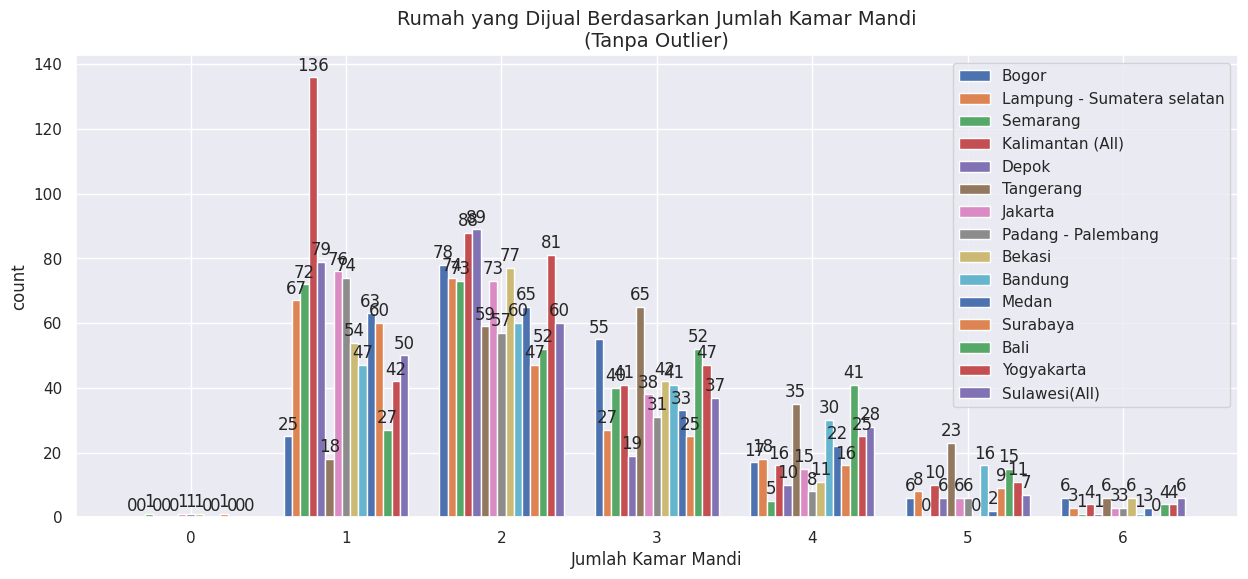

2    1033
1     890
3     593
4     297
5     125
6      51
0       5
Name: KM, dtype: int64

In [ ]:
def groupedbarplot(df_KM_no_outlier, width=0.8, annotate="values", ax=None, **kw):
  ax = ax or plt.gca()
  n = len(df_KM_no_outlier.columns)
  w = 1./n
  pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
  w *= width
  bars = []
  for col, x in zip(df_KM_no_outlier.columns, pos):
    bars.append(ax.bar(np.arange(len(df_KM_no_outlier))+x, df_KM_no_outlier[col].values, width=w, **kw))
    for val, xi in zip(df_KM_no_outlier[col].values, np.arange(len(df_KM_no_outlier))+x):
      if annotate:
        txt = val if annotate == "values" else col
        ax.annotate(txt, xy=(xi, val), xytext=(0,2), textcoords="offset points",ha="center", va="bottom")
  ax.set_xticks(np.arange(len(df_KM_no_outlier)))
  ax.set_xticklabels(df_KM_no_outlier.index)
  return bars

counts = df_KM_no_outlier.groupby(["KM","daerah"]).size().unstack()
data_nomor_5 = df_KM_no_outlier['daerah']
proporsion = Counter(data_nomor_5)
labels = proporsion.keys()

plt.figure(figsize=(15,6))
groupedbarplot(counts)
plt.legend(labels, loc = "best")
plt.title('Rumah yang Dijual Berdasarkan Jumlah Kamar Mandi\n(Tanpa Outlier)', fontsize=14)
plt.xlabel("Jumlah Kamar Mandi")
plt.ylabel("count")
plt.show()


df_KM_no_outlier['KM'].value_counts()

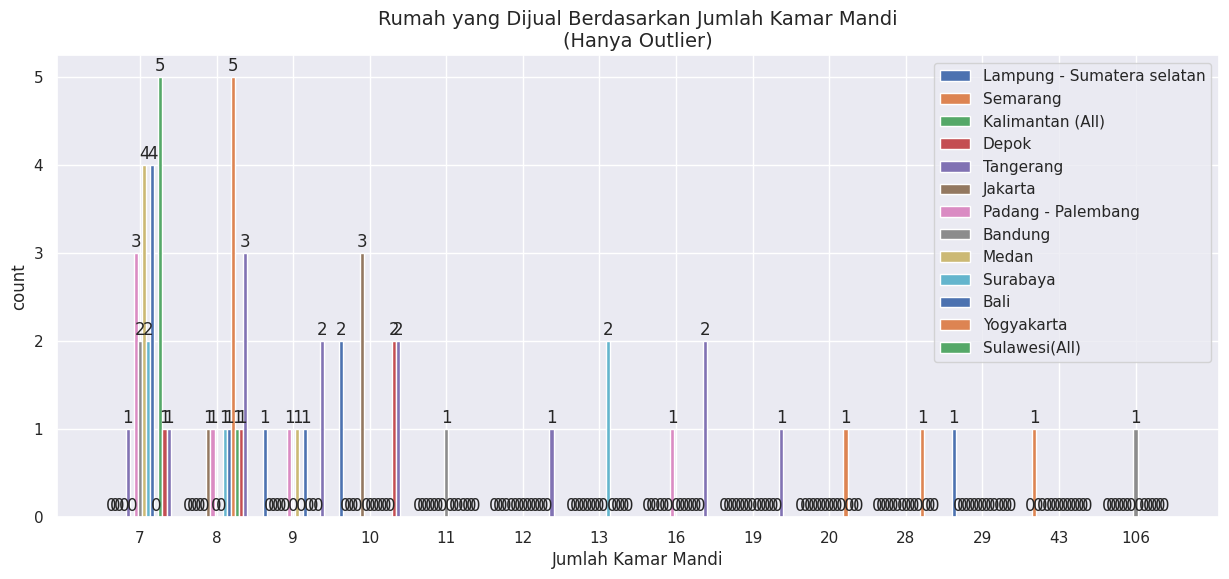

7      23
8      14
10      9
9       6
16      3
13      2
106     1
11      1
43      1
29      1
12      1
19      1
28      1
20      1
Name: KM, dtype: int64

In [ ]:
def groupedbarplot(df_KM_outlier, width=0.8, annotate="values", ax=None, **kw):
  ax = ax or plt.gca()
  n = len(df_KM_outlier.columns)
  w = 1./n
  pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
  w *= width
  bars = []
  for col, x in zip(df_KM_outlier.columns, pos):
    bars.append(ax.bar(np.arange(len(df_KM_outlier))+x, df_KM_outlier[col].values, width=w, **kw))
    for val, xi in zip(df_KM_outlier[col].values, np.arange(len(df_KM_outlier))+x):
      if annotate:
        txt = val if annotate == "values" else col
        ax.annotate(txt, xy=(xi, val), xytext=(0,2), textcoords="offset points",ha="center", va="bottom")
  ax.set_xticks(np.arange(len(df_KM_outlier)))
  ax.set_xticklabels(df_KM_outlier.index)
  return bars

counts = df_KM_outlier.groupby(["KM","daerah"]).size().unstack()
data_nomor_5 = df_KM_outlier['daerah']
proporsion = Counter(data_nomor_5)
labels = proporsion.keys()

plt.figure(figsize=(15,6))
groupedbarplot(counts)
plt.legend(labels, loc = "best")
plt.title('Rumah yang Dijual Berdasarkan Jumlah Kamar Mandi\n(Hanya Outlier)', fontsize=14)
plt.xlabel("Jumlah Kamar Mandi")
plt.ylabel("count")
plt.show()


df_KM_outlier['KM'].value_counts()

Berdasarkan bar chart rumah dari seluruh daerah yang dipasarkan di website online,

rumah ukuran kecil-sedang yang dijual kebanyakan memiliki jumlah kamar mandi (dari paling banyak ke paling sedikit):
1. Rumah 2 Kamar Mandi
2. Rumah 1 Kamar Mandi
3. Rumah 3 Kamar Mandi
4. Rumah 4 Kamar Mandi
5. Rumah 5 Kamar Mandi

rumah ukuran besar yang dijual kebanyakan memiliki jumlah kamar mandi (dari paling banyak ke paling sedikit):
1. Rumah 7 Kamar Mandi
2. Rumah 8 Kamar Mandi
3. Rumah 10 Kamar Mandi

##### **Hadap**

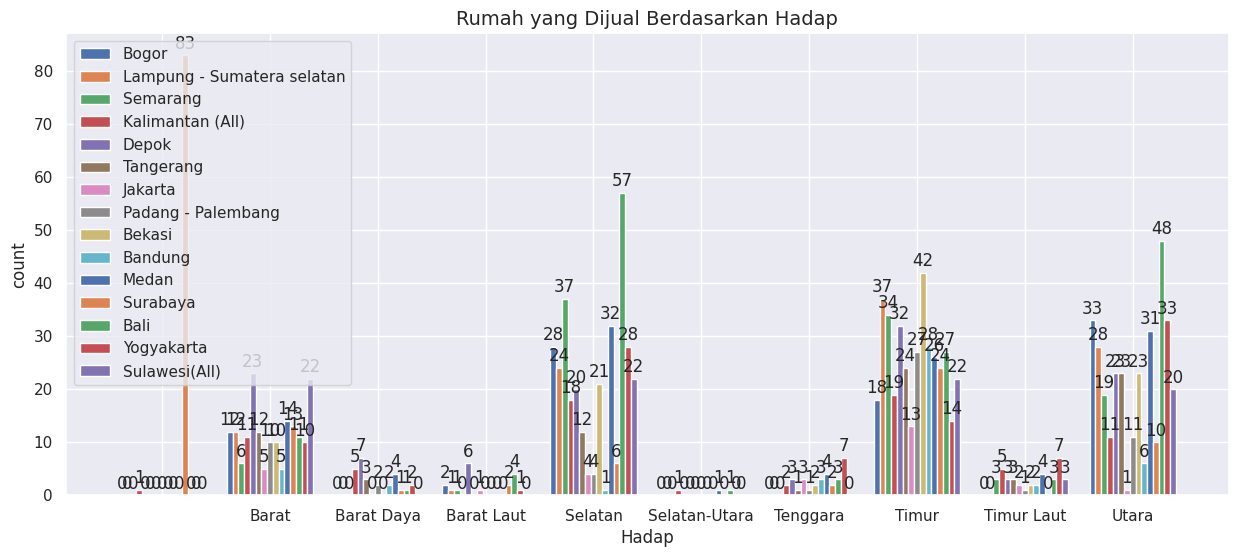

Timur            387
Utara            320
Selatan          314
Barat            176
                  84
Timur Laut        38
Tenggara          31
Barat Daya        27
Barat Laut        18
Selatan-Utara      3
Name: hadap, dtype: int64

In [ ]:
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
  ax = ax or plt.gca()
  n = len(df.columns)
  w = 1./n
  pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
  w *= width
  bars = []
  for col, x in zip(df.columns, pos):
    bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
    for val, xi in zip(df[col].values, np.arange(len(df))+x):
      if annotate:
        txt = val if annotate == "values" else col
        ax.annotate(txt, xy=(xi, val), xytext=(0,2), textcoords="offset points",ha="center", va="bottom")
  ax.set_xticks(np.arange(len(df)))
  ax.set_xticklabels(df.index)
  return bars

counts = df.groupby(["hadap","daerah"]).size().unstack()
data_nomor_5 = df['daerah']
proporsion = Counter(data_nomor_5)
labels = proporsion.keys()

plt.figure(figsize=(15,6))
groupedbarplot(counts)
plt.legend(labels, loc = "best")
plt.title('Rumah yang Dijual Berdasarkan Hadap', fontsize=14)
plt.xlabel("Hadap")
plt.ylabel("count")
plt.show()

df['hadap'].value_counts()

Berdasarkan bar chart rumah dari seluruh daerah yang dipasarkan di website online,

rumah yang dijual kebanyakan menghadap (dari paling banyak ke paling sedikit):
1. Timur
2. Utara
3. Selatan
4. Barat
5. Timur Laut
6. Tenggara
7. Barat Daya
8. Barat Laut
9. Selatan-Utara

##### **Listrik**

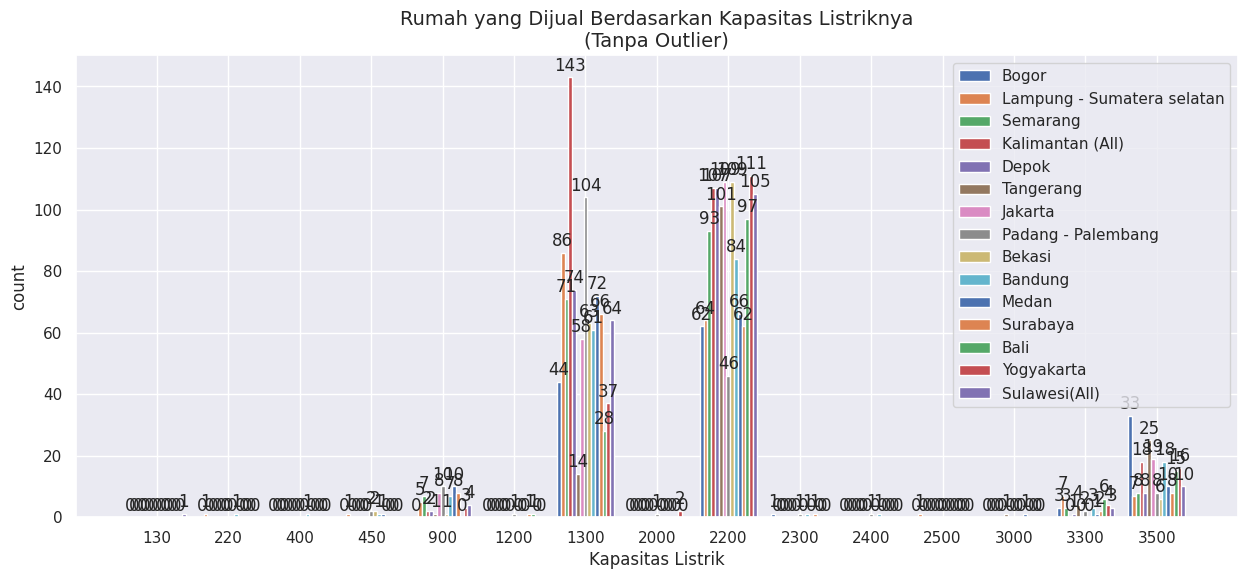

2200    1323
1300     985
3500     209
900       68
3300      39
450        7
2300       4
1200       3
2000       3
2400       2
3000       2
220        2
400        1
2500       1
130        1
Name: listrik, dtype: int64

In [ ]:
def groupedbarplot(df_listrik_no_outlier, width=0.8, annotate="values", ax=None, **kw):
  ax = ax or plt.gca()
  n = len(df_listrik_no_outlier.columns)
  w = 1./n
  pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
  w *= width
  bars = []
  for col, x in zip(df_listrik_no_outlier.columns, pos):
    bars.append(ax.bar(np.arange(len(df_listrik_no_outlier))+x, df_listrik_no_outlier[col].values, width=w, **kw))
    for val, xi in zip(df_listrik_no_outlier[col].values, np.arange(len(df_listrik_no_outlier))+x):
      if annotate:
        txt = val if annotate == "values" else col
        ax.annotate(txt, xy=(xi, val), xytext=(0,2), textcoords="offset points",ha="center", va="bottom")
  ax.set_xticks(np.arange(len(df_listrik_no_outlier)))
  ax.set_xticklabels(df_listrik_no_outlier.index)
  return bars

counts = df_listrik_no_outlier.groupby(["listrik","daerah"]).size().unstack()
data_nomor_5 = df_listrik_no_outlier['daerah']
proporsion = Counter(data_nomor_5)
labels = proporsion.keys()

plt.figure(figsize=(15,6))
groupedbarplot(counts)
plt.legend(labels, loc = "best")
plt.title('Rumah yang Dijual Berdasarkan Kapasitas Listriknya\n(Tanpa Outlier)', fontsize=14)
plt.xlabel("Kapasitas Listrik")
plt.ylabel("count")
plt.show()


df_listrik_no_outlier['listrik'].value_counts()

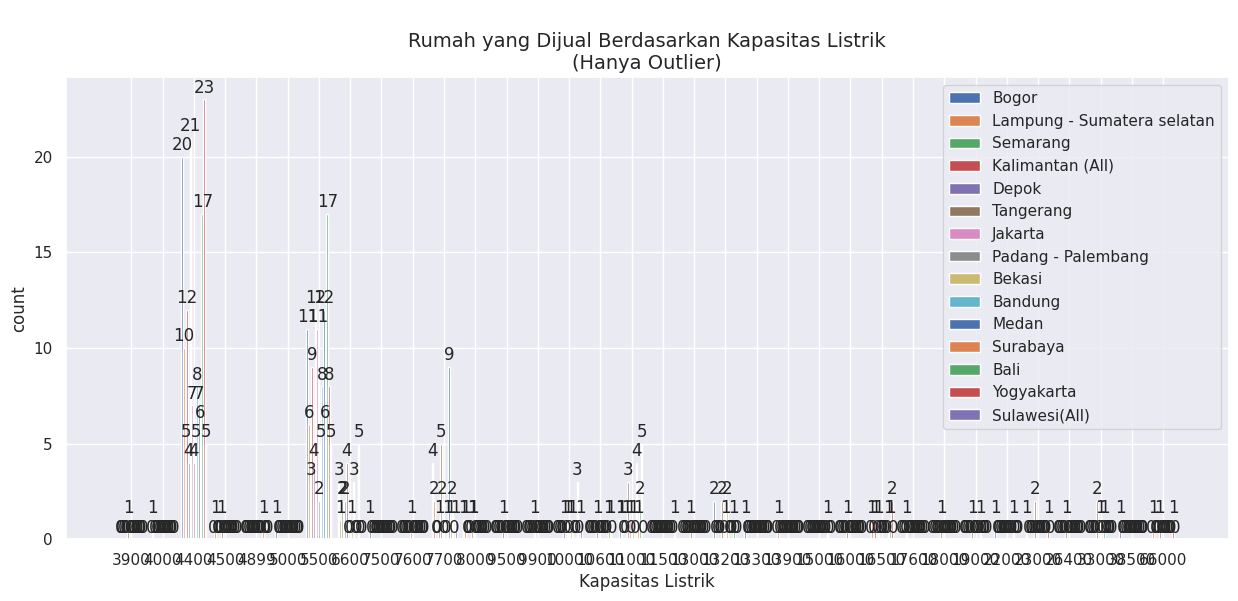

4400     154
5500     119
7700      28
6600      23
11000     20
10000      8
13200      8
16500      7
33000      4
8000       4
23000      4
10600      3
66000      3
22000      2
4500       2
19000      2
4000       1
38500      1
11500      1
13300      1
7500       1
5000       1
15000      1
13900      1
17600      1
3900       1
16000      1
9500       1
9900       1
26400      1
13000      1
18000      1
7600       1
4899       1
Name: listrik, dtype: int64

In [ ]:
def groupedbarplot(df_listrik_outlier, width=0.8, annotate="values", ax=None, **kw):
  ax = ax or plt.gca()
  n = len(df_listrik_outlier.columns)
  w = 1./n
  pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
  w *= width
  bars = []
  for col, x in zip(df_listrik_outlier.columns, pos):
    bars.append(ax.bar(np.arange(len(df_listrik_outlier))+x, df_listrik_outlier[col].values, width=w, **kw))
    # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    for val, xi in zip(df_listrik_outlier[col].values, np.arange(len(df_listrik_outlier))+x):
      if annotate:
        txt = val if annotate == "values" else col
        ax.annotate(txt, xy=(xi, val), xytext=(0,2), textcoords="offset points",ha="center", va="bottom")
  ax.set_xticks(np.arange(len(df_listrik_outlier)))
  ax.set_xticklabels(df_listrik_outlier.index)
  return bars

counts = df_listrik_outlier.groupby(["listrik","daerah"]).size().unstack()
data_nomor_5 = df_listrik_outlier['daerah']
proporsion = Counter(data_nomor_5)
labels = proporsion.keys()

plt.figure(figsize=(15,6))
groupedbarplot(counts)
plt.legend(labels, loc = "best")
plt.title('\nRumah yang Dijual Berdasarkan Kapasitas Listrik\n(Hanya Outlier)', fontsize=14)
plt.xlabel("Kapasitas Listrik")
plt.ylabel("count")
plt.show()

df_listrik_outlier['listrik'].value_counts()

Berdasarkan bar chart rumah dari seluruh daerah yang dipasarkan di website online,

rumah ukuran kecil-sedang yang dijual kebanyakan memiliki kapasitas listrik (dari paling banyak ke paling sedikit):
1. 2200
2. 1300
3. 3500

rumah ukuran besar yang dijual kebanyakan memiliki kapasitas listrik (dari paling banyak ke paling sedikit):
1. 4400
2. 5500

##### **Luas Tanah**

72.0     147
60.0     143
90.0     123
120.0    107
100.0     84
        ... 
221.0      1
311.0      1
307.0      1
161.0      1
219.0      1
Name: LT, Length: 298, dtype: int64

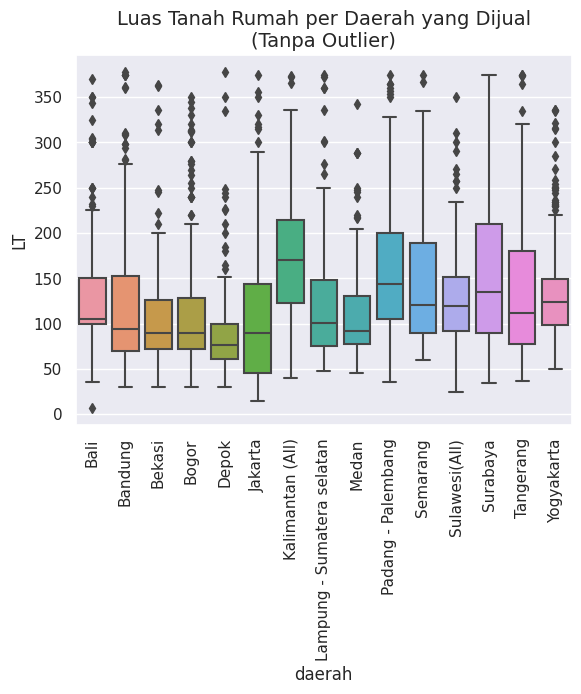

In [ ]:
p= sns.boxplot(x="daerah", y="LT", data=df_LT_no_outlier)
plt.xticks(rotation=90)
plt.title('Luas Tanah Rumah per Daerah yang Dijual\n(Tanpa Outlier)', fontsize=14)

df_LT_no_outlier['LT'].value_counts()

400.0     15
450.0      7
600.0      7
500.0      6
719.0      5
          ..
2300.0     1
532.0      1
533.0      1
2280.0     1
424.0      1
Name: LT, Length: 183, dtype: int64

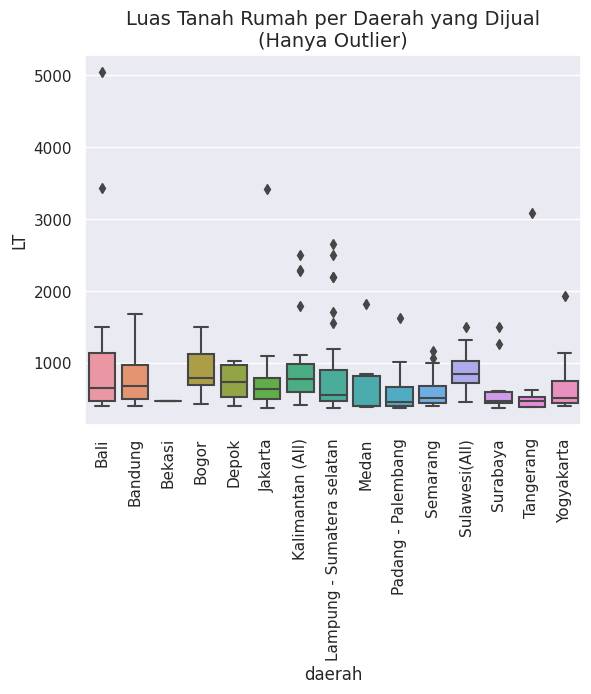

In [ ]:
p= sns.boxplot(x="daerah", y="LT", data=df_LT_outlier)
plt.xticks(rotation=90)
plt.title('Luas Tanah Rumah per Daerah yang Dijual\n(Hanya Outlier)', fontsize=14)

df_LT_outlier['LT'].value_counts()

Berdasarkan bar chart rumah dari seluruh daerah yang dipasarkan di website online,

rumah ukuran kecil-sedang yang dijual kebanyakan memiliki luas tanah (dari paling banyak ke paling sedikit):
1. 72 meter kuadrat
2. 60 meter kuadrat
3. 90 meter kuadrat
4. 120 meter kuadrat
5. 100 meter kuadrat

rumah ukuran besar yang dijual kebanyakan memiliki luas tanah (dari paling banyak ke paling sedikit):
1. 400 meter kuadrat
2. 450 meter kuadrat & 600 meter kuadrat
3. 500 meter kuadrat

##### **Luas Bangunan**

45.0     146
36.0     137
100.0    112
70.0     106
60.0     106
        ... 
262.0      1
221.0      1
227.0      1
308.0      1
322.0      1
Name: LB, Length: 275, dtype: int64

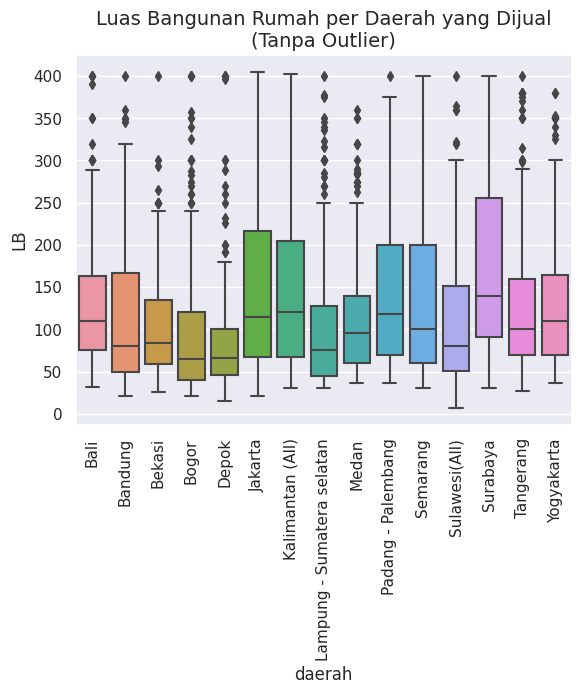

In [ ]:
p= sns.boxplot(x="daerah", y="LB", data=df_LB_no_outlier)
plt.xticks(rotation=90)
plt.title('Luas Bangunan Rumah per Daerah yang Dijual\n(Tanpa Outlier)', fontsize=14)

df_LB_no_outlier['LB'].value_counts()

500.0    28
450.0    22
600.0    15
700.0    12
800.0     8
         ..
672.0     1
494.0     1
626.0     1
432.0     1
467.0     1
Name: LB, Length: 82, dtype: int64

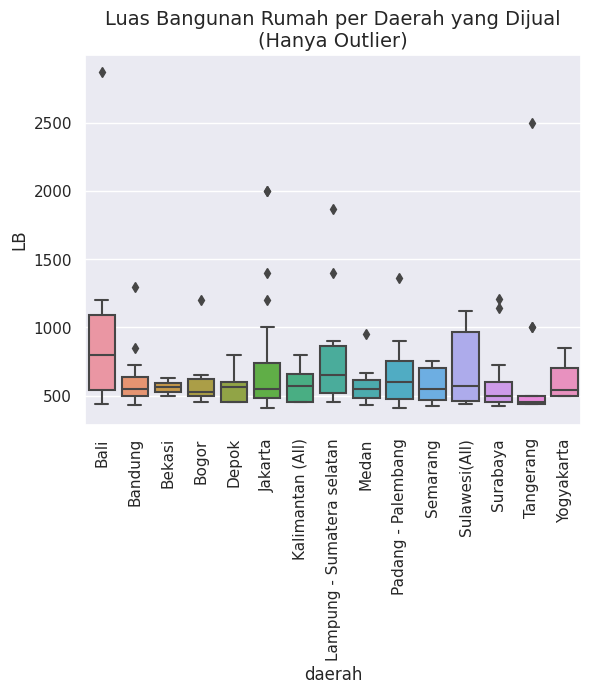

In [ ]:
p= sns.boxplot(x="daerah", y="LB", data=df_LB_outlier)
plt.xticks(rotation=90)
plt.title('Luas Bangunan Rumah per Daerah yang Dijual\n(Hanya Outlier)', fontsize=14)

df_LB_outlier['LB'].value_counts()

Berdasarkan bar chart rumah dari seluruh daerah yang dipasarkan di website online,

rumah ukuran kecil-sedang yang dijual kebanyakan memiliki luas bangunan (dari paling banyak ke paling sedikit):
1. 45 meter kuadrat
2. 36 meter kuadrat
3. 100 meter kuadrat
4. 70 meter kuadrat
5. 60 meter kuadrat

rumah ukuran besar yang dijual kebanyakan memiliki luas bangunan (dari paling banyak ke paling sedikit):
1. 500 meter kuadrat
2. 450 meter kuadrat
3. 700 meter kuadrat
4. 800 meter kuadrat

#### 6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?


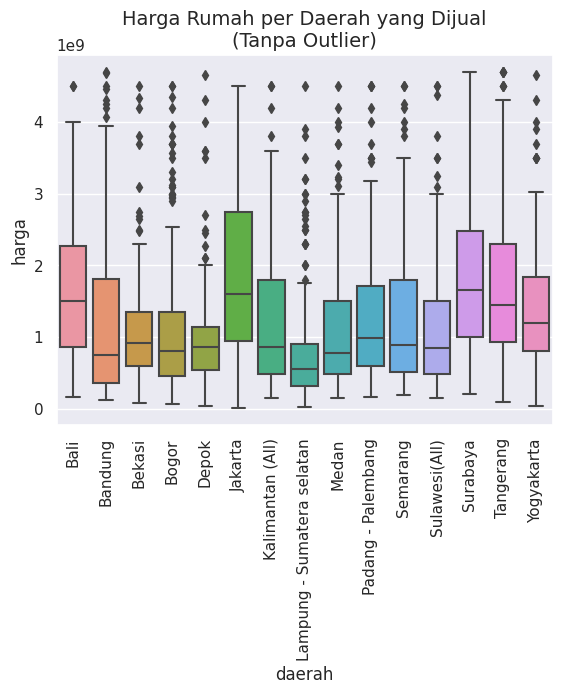

In [ ]:
p= sns.boxplot(x="daerah", y="harga", data=df_harga_no_outlier)
plt.xticks(rotation=90)
plt.title('Harga Rumah per Daerah yang Dijual\n(Tanpa Outlier)', fontsize=14)
plt.show()

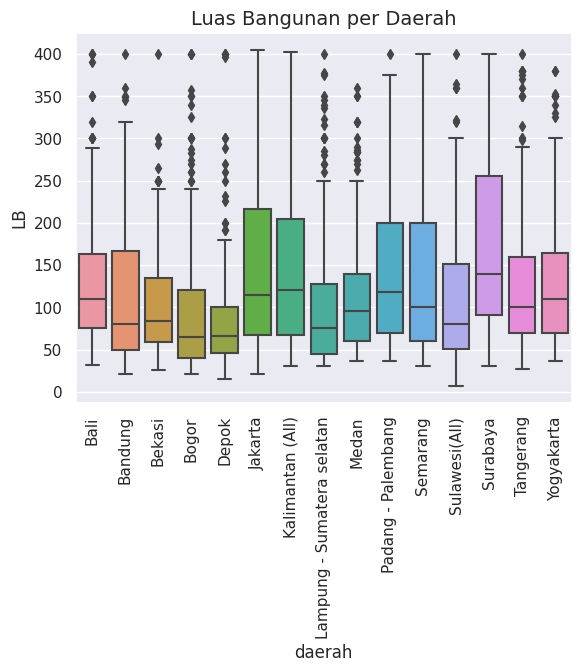

In [ ]:
p= sns.boxplot(x="daerah", y="LB", data=df_LB_no_outlier)
plt.xticks(rotation=90)
plt.title('Luas Bangunan per Daerah', fontsize=14)
plt.show()

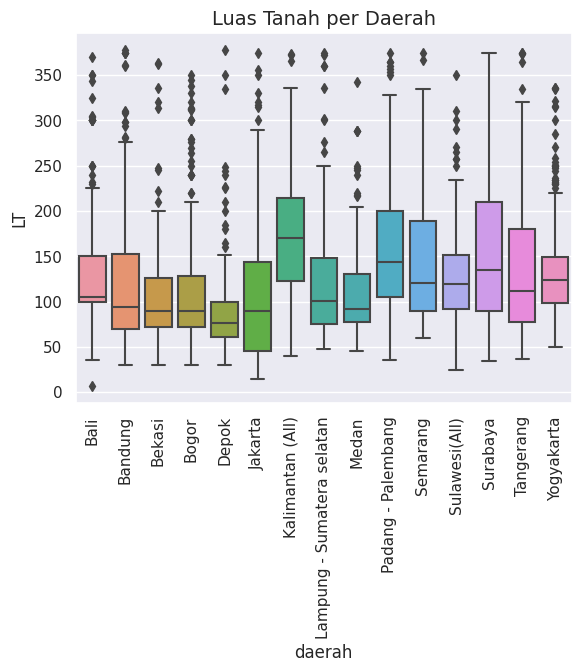

In [ ]:
p= sns.boxplot(x="daerah", y="LT", data=df_LT_no_outlier)
plt.xticks(rotation=90)
plt.title('Luas Tanah per Daerah', fontsize=14)
plt.show()

Dari data yang tersedia, kami dapat merekomendasikan rumah pada beberapa daerah berikut:
* Lampung - Sumatera selatan, daerah Lampung mempunyai harga yang relatif lebih murah daripada kota lainnya dan Luas bangunan yang relatif sama dengan daerah lain sehingga dapat menjadi pertimbangan
* Surabaya, daerah Surabaya mempunyai rumah dengan luas bangunan dan tanah yang luas dibandingkan dengan daerah lain, tetapi harga rumahnya juga relatif mahal.
* Jakarta, daerah jakarta mempunyai harga rumah yang relatif mahal, tetapi dengan luas bangunan dan tanah yang cukup luas dibandingkan dengan daerah lain. Selain itu, Jakarta merupakan Ibukota sehingga *demand* untuk rumah akan tinggi.

Namun, jika hanya menggunakan dataset tersebut, kami kurang yakin dapat merekomendasikan daerah yang berpotensi menghasilkan keuntungan karena adanya faktor lain seperti akses jalan, rawan banjir, dan lainnya. Selain itu, investasi yang dilakukan dapat beragam dan berbeda-beda kebutuhannya. Misalnya  untuk lahan perkebunan akan dipilih harga per meter yang murah.

**Oleh karena itu**, dataset yang digunakan perlu ditambahkan faktor lain untuk mendukung pilihan investasi perusahaan.

#### 7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?


Berikut adalah beberapa visualisasi tambahan dari data tersebut

In [ ]:
df_HLT_no_outlier = pd.concat([df["daerah"],df_harga_no_outlier["harga"],df_LT_no_outlier["LT"]], axis = 1, join='inner')
df_HLT_no_outlier

,daerah,harga,LT
0,Bogor,692550000,75.0
1,Bogor,811400000,60.0
2,Bogor,900500000,60.0
3,Bogor,1001900000,60.0
4,Bogor,1200800000,90.0
...,...,...,...
3053,Sulawesi(All),1100000000,135.0
3055,Sulawesi(All),675000000,96.0
3056,Sulawesi(All),348000000,115.0
3057,Sulawesi(All),175000000,102.0


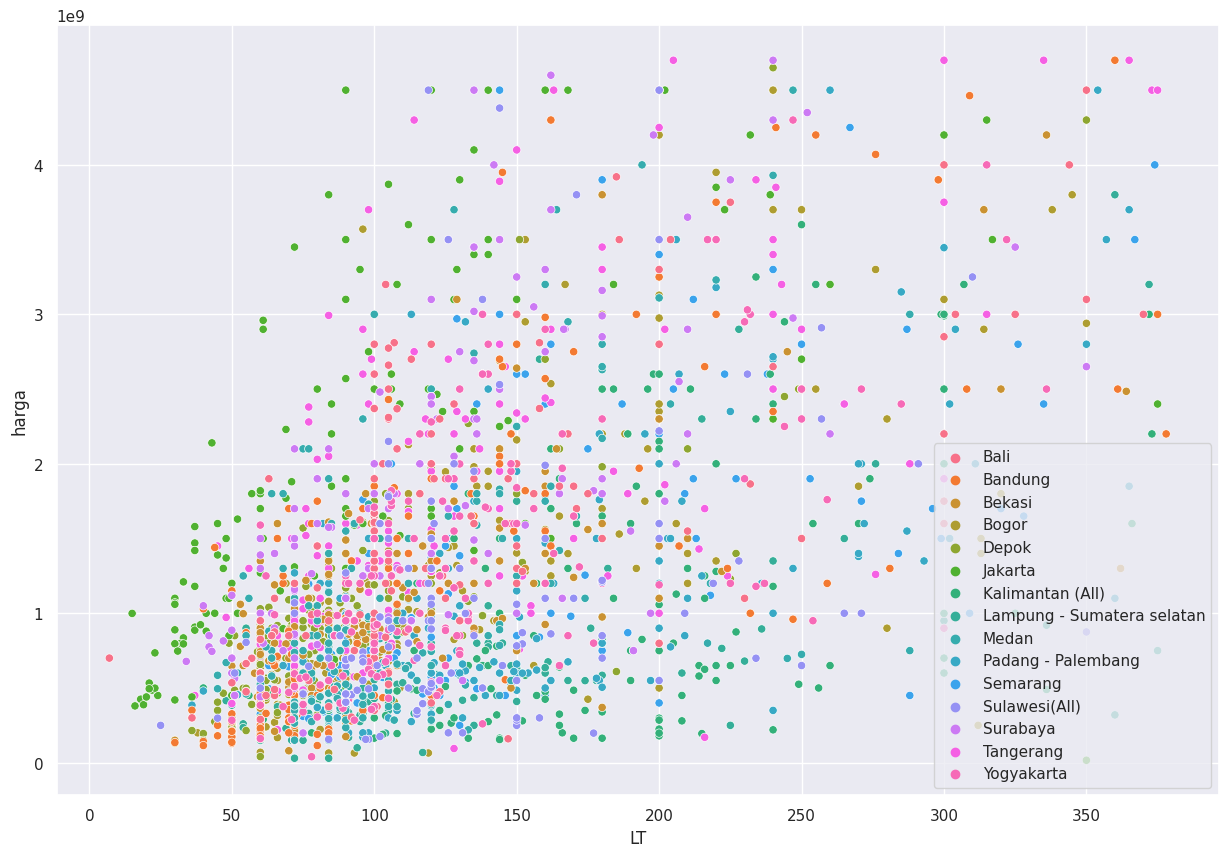

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x="LT", y="harga",hue ="daerah" , data = df_HLT_no_outlier )
plt.legend(loc=4)

In [ ]:
df_HLB_no_outlier = pd.concat([df["daerah"],df_harga_no_outlier["harga"],df_LT_no_outlier["LB"]],axis = 1, join='inner')
df_HLB_no_outlier

,daerah,harga,LB
0,Bogor,692550000,38.0
1,Bogor,811400000,40.0
2,Bogor,900500000,50.0
3,Bogor,1001900000,70.0
4,Bogor,1200800000,60.0
...,...,...,...
3053,Sulawesi(All),1100000000,80.0
3055,Sulawesi(All),675000000,96.0
3056,Sulawesi(All),348000000,45.0
3057,Sulawesi(All),175000000,72.0


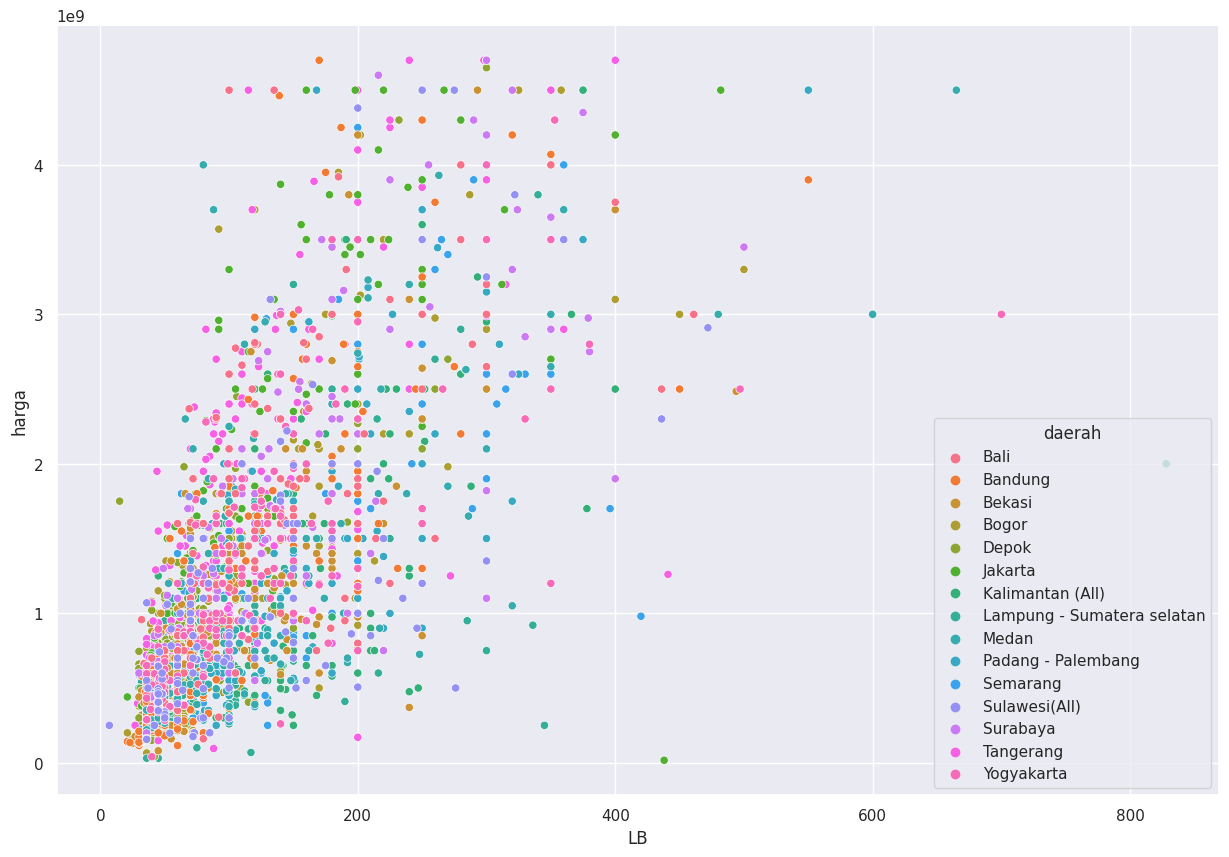

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
p = sns.scatterplot(x="LB", y="harga", hue = "daerah", data = df_HLB_no_outlier )

In [ ]:
df_HLB_outlier = pd.concat([df["daerah"],df_harga_outlier["harga"],df_LT_outlier["LB"]], axis = 1, join='inner')
df_HLB_outlier

,daerah,harga,LB
26,Bogor,9900000000,1200.0
27,Bogor,7300000000,350.0
37,Bogor,15000000000,500.0
100,Bogor,7000000000,400.0
103,Bogor,5500000000,340.0
...,...,...,...
2987,Sulawesi(All),9000000000,1124.0
2988,Sulawesi(All),9000000000,1124.0
2989,Sulawesi(All),9000000000,1124.0
3037,Sulawesi(All),9500000000,1000.0


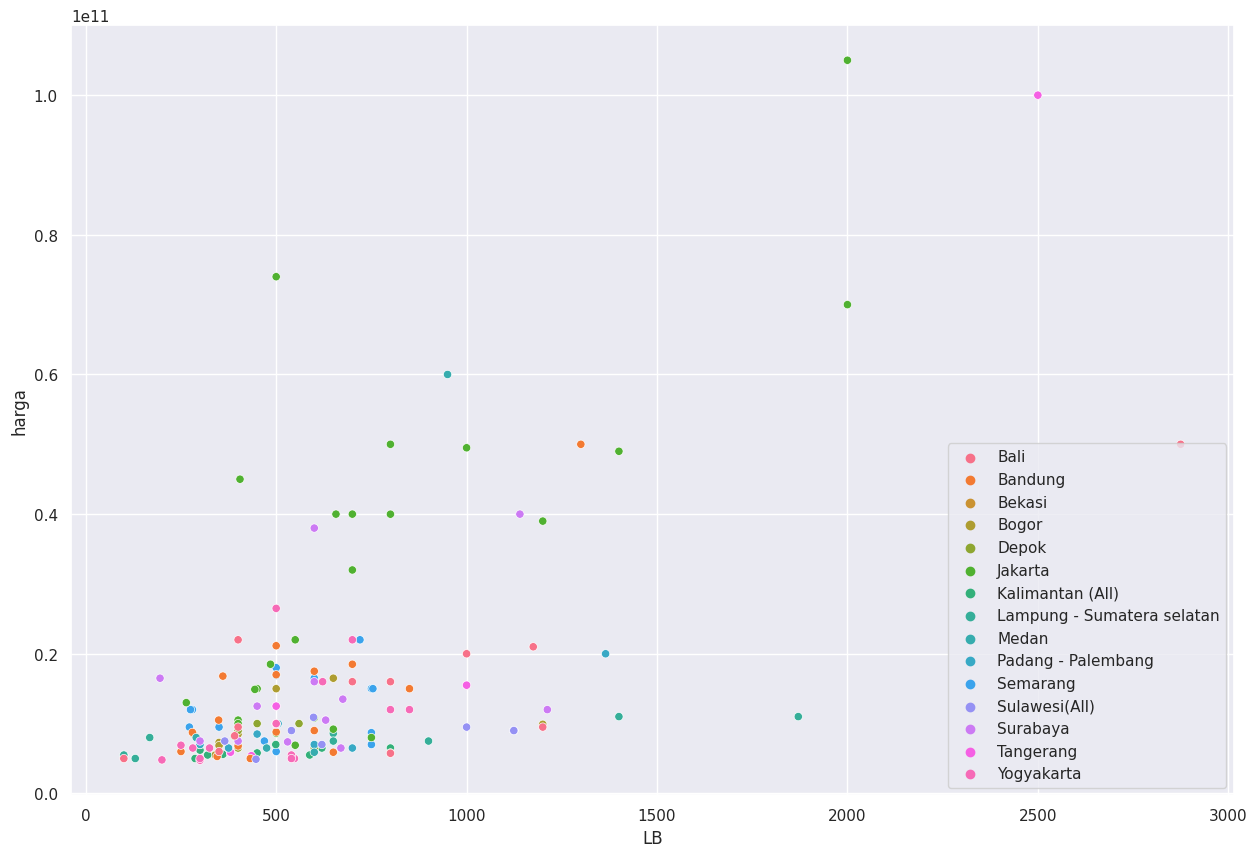

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
p = sns.scatterplot(x="LB", y="harga",hue="daerah",data = df_HLB_outlier )
plt.legend(loc=4)

In [ ]:
df_HLT_outlier = pd.concat([df["daerah"],df_harga_outlier["harga"],df_LT_outlier["LT"]], axis = 1, join='inner')
df_HLT_outlier

,daerah,harga,LT
26,Bogor,9900000000,1500.0
27,Bogor,7300000000,699.0
37,Bogor,15000000000,1272.0
100,Bogor,7000000000,800.0
103,Bogor,5500000000,437.0
...,...,...,...
2987,Sulawesi(All),9000000000,719.0
2988,Sulawesi(All),9000000000,719.0
2989,Sulawesi(All),9000000000,719.0
3037,Sulawesi(All),9500000000,1320.0


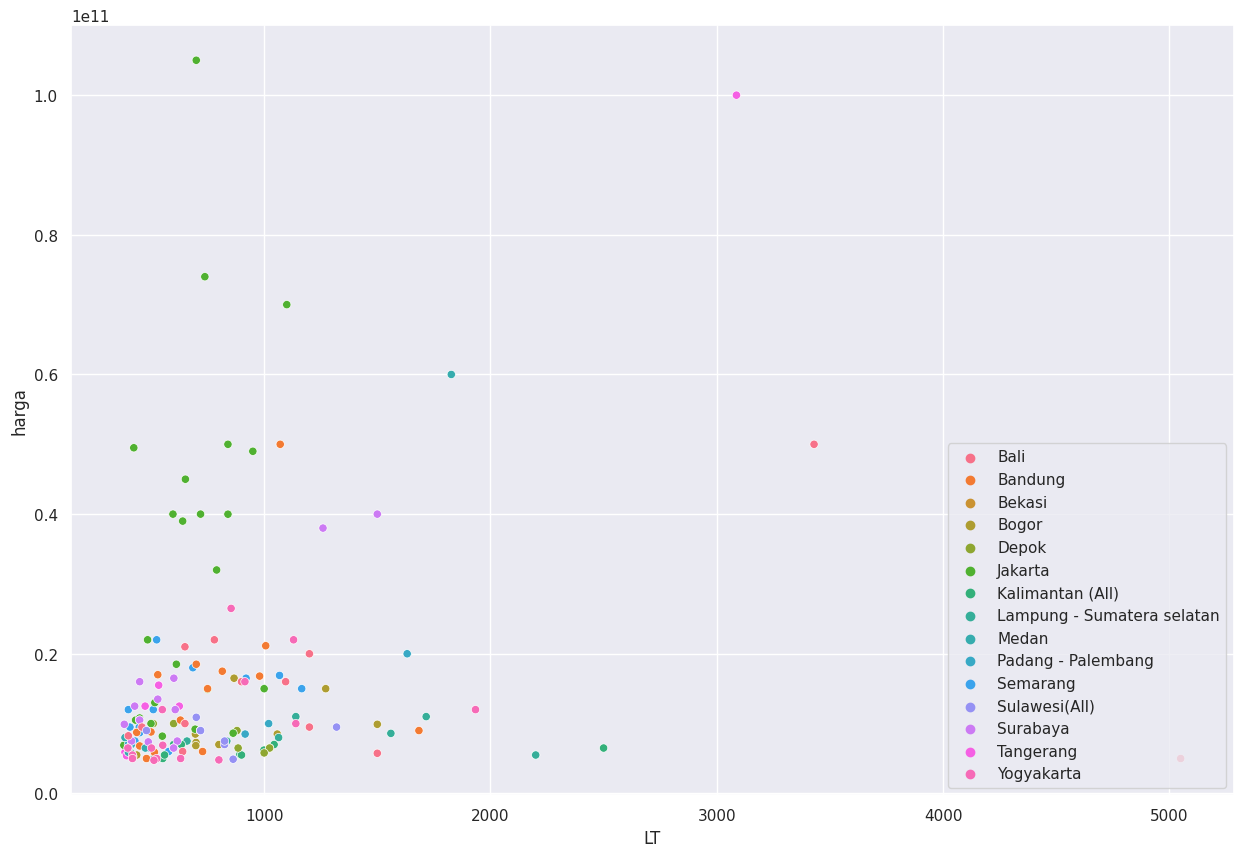

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
p = sns.scatterplot(x="LT", y="harga",hue="daerah",data = df_HLT_outlier )
plt.legend(loc=4)